<a href="https://colab.research.google.com/github/tina3860/Remote-Work/blob/Edit/remote_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Available on GitHub**

V. Nguyen, “GitHub - tina3860/Remote-Work: Remote Work Data Analysis Research,” GitHub. https://github.com/tina3860/Remote-Work

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
import plotly.graph_objects as go
import statistics
import sys
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

# NSW 2020 Data

## Import and Read Data

Import 2020 data and read a sample of the data. Get basic informtion about the dataset.

In [ ]:
#import NSW 2020 survey data
nsw_2020 = pd.read_csv('/content/drive/MyDrive/School/grad/Spring 24/CPSC 5175/Final Project /Data sets/NSW+Remote+Working+Survey.Australian Survey/rws_2020_.csv')

nsw_2020.set_index("response_ID", inplace = True)


#2020 info
nsw_2020.head()

#shape
print('Shape 2020: ' + str(nsw_2020.shape))

Shape 2020: (1507, 72)


In [ ]:
nsw_2020

,birth_year,gender,industry,industry_detailed,occupation,occupation_detailed,current_employment_num,manager,household_descrip,current_job_length,...,compare_remote_3,compare_remote_4,compare_remote_5,compare_remote_6,compare_remote_7,compare_remote_8,compare_remote_9,compare_remote_10,compare_remote_11,compare_remote_12
response_ID,,,,,,,,,,,,,,,,,,,,,
1,1972,Female,Manufacturing,Food Product Manufacturing,Clerical and administrative,Other Clerical and Administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,...,Managing my personal commitments,My opportunities to socialise,Preparing for work and commuting,My working relationships,Managing my personal commitments,The number of hours I work,My job satisfaction,The number of hours I work,Managing my personal commitments,My opportunities to socialise
2,1972,Male,Wholesale Trade,Other Goods Wholesaling,Managers,"Chief Executives, General Managers and Legisla...",Between 1 and 4,Yes,Couple with dependent children,More than 5 years,...,Preparing for work and commuting,My working relationships,Preparing for work and commuting,My working relationships,My work-life balance,My on-the-job learning opportunities,My work-life balance,My on-the-job learning opportunities,My personal relationships,My opportunities to socialise
3,1982,Male,"Electricity, Gas, Water and Waste Services",Gas Supply,Managers,"Chief Executives, General Managers and Legisla...",More than 200,Yes,One parent family with dependent children,More than 5 years,...,Managing my personal commitments,Preparing for work and commuting,Preparing for work and commuting,Managing my family responsibilities,The number of hours I work,My mental wellbeing,The number of hours I work,My daily expenses,My mental wellbeing,My daily expenses
4,1987,Female,"Professional, Scientific and Technical Services","Professional, Scientific and Technical Services",Professionals,ICT Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,...,Preparing for work and commuting,My opportunities to socialise,My personal relationships,My working relationships,My work-life balance,My on-the-job learning opportunities,My work-life balance,My on-the-job learning opportunities,My personal relationships,My job satisfaction
5,1991,Male,"Transport, Postal and Warehousing",Other Transport,Managers,Specialist Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,...,Managing my personal commitments,My working relationships,Preparing for work and commuting,My daily expenses,My work-life balance,My on-the-job learning opportunities,My work-life balance,My on-the-job learning opportunities,My opportunities to socialise,My job satisfaction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,1995,Male,"Rental, Hiring and Real Estate Services",Rental and Hiring Services (except Real Estate),Technicians and trades,"Engineering, ICT and Science Technicians",Between 20 and 199,NaN,Single person,Between 1 and 5 years,...,My mental wellbeing,Preparing for work and commuting,Managing my family responsibilities,My personal relationships,My opportunities to socialise,My work-life balance,My job satisfaction,My personal relationships,My opportunities to socialise,My mental wellbeing
1504,1990,Female,Wholesale Trade,"Grocery, Liquor and Tobacco Product Wholesaling",Managers,"Chief Executives, General Managers and Legisla...",Between 20 and 199,NaN,Couple with dependent children,More than 5 years,...,My mental wellbeing,My working relationships,Managing my family responsibilities,My personal relationships,The number of hours I work,My opportunities to socialise,My personal relationships,My job satisfaction,Managing my personal commitments,My personal relationships
1505,1998,Male,Health Care and Social Assistance,Hospitals,Professionals,Health Professionals,Between 20 and 199,NaN,Single person,Between 1 and 5 years,...,Managing my personal commitments,

In [ ]:
#info
nsw_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1507 entries, 1 to 1507
Data columns (total 72 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   birth_year                           1507 non-null   int64  
 1   gender                               1507 non-null   object 
 2   industry                             1507 non-null   object 
 3   industry_detailed                    1507 non-null   object 
 4   occupation                           1507 non-null   object 
 5   occupation_detailed                  1507 non-null   object 
 6   current_employment_num               1507 non-null   object 
 7   manager                              1371 non-null   object 
 8   household_descrip                    1507 non-null   object 
 9   current_job_length                   1507 non-null   object 
 10  metro_regional                       1507 non-null   object 
 11  remote_time_2019                   

## Cleaning Data

**Condensing Column Names:**


The original column names in the survey were in the form of questions. To facilitate easy recall of column names and to identify the same column from multiple data sets, I renamed the columns. The new names provided a general idea of the survey question for better readability of the data. I removed punctuation marks and spaces from the column names and replaced them with underscores or dashes.

---

**Dropping Duplicate Columns:**

There are two duplicate columns, industry_detailed and occupation_detailed. These are detailed versions of the orignal industry and occupation columns. In 2021, the researchers updated their survey to ommit the detailed version.  

---
**Replacing Missing Values:**

In columns that had an object data type that consists of strings, all missing values are replaced with "Not Available". For the columns that have float types, they were replaced with 0.

---


**Changing Data Types:**

Some of the columns that seemed to be mainly floats were categorized as object types because it was written as a string. The time preferred columns are percentages with additional descriptive labels such as, "50% - About half of my time". The description will be removed only leaving a number to be turned into a float type. To do this, you can use regular expressions to extract the numerical value from the string and then convert it to a float.Identifying the regex pattern as r'(\d+(?:\.\d+)?)%', for most of both data sets, to only identify the numbers. For productivity_hour and productivity_hour_management, the regex pattern is r'(\d+(?:\.\d+)?)%\s*(more|less)'. This will identify some numbers as a negative number.

Note that the rows that contained purely strings with no numbers ("I would not have preferred to work remotely") are considered 0.00%. The label that summed up anything less than 10% is considered to be just 10%. Any non-responses are replaced with NaN.

---


### Condensing Column Names

Mnaully went through the data set and set the column names. See [NSW Variable Dictionary](https://drive.google.com/file/d/1xhAlx9AIVolZWWaDilzwdadrfXsMxgCX/view?usp=drive_link) for the list of the column names and the survey questions they are linked to.



### Dropping Duplicates & Replacing Missing Values

In [ ]:
#drop duplicate columns
nsw_2020 = nsw_2020.drop(['industry_detailed', 'occupation_detailed'],axis = 'columns',)

# Replace missing values with "Not Available" in columns: 'agr_dis_2019_encouraged', 'agr_dis_2019_prep' and 10 other columns
nsw_2020 = nsw_2020.fillna({'agr_dis_2019_encouraged': "Not Available", 'agr_dis_2019_prep': "Not Available", 'agr_dis_2019_common': "Not Available", 'agr_dis_2019_permission': "Not Available", 'agr_dis_2019_collab': "Not Available", 'agr_dis_2019_recommend': "Not Available", 'agr_dis_last3months_encouraged': "Not Available", 'agr_dis_last3months_prep': "Not Available", 'agr_dis_last3months_common': "Not Available", 'agr_dis_last3months_permission': "Not Available", 'agr_dis_last3months_collab': "Not Available", 'agr_dis_last3months_recommend': "Not Available"})


# Replace missing values with "0" in columns: 'remote_time_2019', 'time_preferred_2019' and 3 other columns
nsw_2020 = nsw_2020.fillna({'remote_time_2019': "0", 'time_preferred_2019': "0", 'time_preferred_last3months': "0", 'time_preferred_covid': "0", 'remote_last3months': "0"})

### Changing Data Types

Changed the data type from object to float on all of the time preferred and remote_time_2019 and remote_last3months.

In [ ]:
# Change column type to float16 for time% columns
#time_preferred_2019



#pattern for regex
pattern = r'(\d+(?:\.\d+)?)%'

for time_preferred_2019 in ['time_preferred_2019', 'time_preferred_covid', 'time_preferred_last3months', 'remote_time_2019', 'remote_last3months']:


#empty dict to store etracted percenetages
  percentages = []

#for each element(i) in the column
time_preferred = nsw_2020['time_preferred_2019']
for i in time_preferred:

    #use regex to extract the numerix part of the string
    match = re.search(pattern,i)

    if match:
        #extract numeric part of string and convert to float
        #note: 'less than 10% of my time' turns into just 10.00
        #note: completely skips over 'I would not have preferred to work remotely'
        numeric_part = float(match.group(1))
        percentages.append(numeric_part)
    else:
        percentages.append(float(0))
print(percentages)


# Convert the list of percentages to a pandas Series and change its type to float16
percentages_series_time_preferred_2019 = pd.Series(percentages, dtype='float16')

# Update the original column with the new values
nsw_2020.update({'time_preferred_2019': percentages_series_time_preferred_2019})

[0.0, 20.0, 50.0, 50.0, 60.0, 40.0, 70.0, 90.0, 60.0, 20.0, 70.0, 40.0, 50.0, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 60.0, 20.0, 50.0, 50.0, 20.0, 70.0, 10.0, 20.0, 100.0, 30.0, 60.0, 30.0, 80.0, 30.0, 50.0, 50.0, 10.0, 20.0, 20.0, 30.0, 30.0, 0.0, 50.0, 80.0, 50.0, 10.0, 40.0, 20.0, 80.0, 40.0, 40.0, 60.0, 30.0, 40.0, 50.0, 40.0, 0.0, 50.0, 20.0, 50.0, 90.0, 50.0, 0.0, 10.0, 20.0, 30.0, 0.0, 80.0, 50.0, 50.0, 50.0, 80.0, 30.0, 80.0, 20.0, 50.0, 40.0, 40.0, 20.0, 40.0, 30.0, 60.0, 50.0, 10.0, 10.0, 50.0, 30.0, 100.0, 10.0, 50.0, 70.0, 100.0, 50.0, 10.0, 50.0, 0.0, 20.0, 100.0, 0.0, 10.0, 50.0, 20.0, 50.0, 40.0, 90.0, 20.0, 40.0, 70.0, 50.0, 50.0, 20.0, 100.0, 40.0, 30.0, 50.0, 100.0, 60.0, 0.0, 40.0, 30.0, 80.0, 20.0, 20.0, 30.0, 30.0, 0.0, 90.0, 10.0, 20.0, 90.0, 90.0, 50.0, 30.0, 40.0, 40.0, 50.0, 20.0, 100.0, 50.0, 0.0, 100.0, 90.0, 100.0, 30.0, 40.0, 20.0, 50.0, 100.0, 50.0, 10.0, 20.0, 50.0, 50.0, 10.0, 40.0, 40.0, 50.0, 10.0, 10.0, 50.0, 50.0, 0.0, 20.0, 100.0, 0.0, 50.0, 30.0, 50.0

In [ ]:
#pattern for regex
pattern = r'(\d+(?:\.\d+)?)%'

for time_preferred_covid in ['time_preferred_2019', 'time_preferred_covid', 'time_preferred_last3months', 'remote_time_2019', 'remote_last3months']:


#empty dict to store etracted percenetages
  percentages1 = []

#for each element(i) in the column
for i in nsw_2020['time_preferred_covid']:
  if isinstance(i, str):
    #use regex to extract the numerix part of the string
    match = re.search(pattern,i)

    if match:
        #extract numeric part of string and convert to float
        #note: 'less than 10% of my time' turns into just 10.00
        #note: completely skips over 'I would not have preferred to work remotely'
        numeric_part = float(match.group(1))
        percentages1.append(numeric_part)
    else:
        percentages1.append(float('0'))    # Assign a default value for strings that don't have numbers
  else: percentages1.append(float('0'))   # Handle non-string elements
print(percentages1)


# Convert the list of percentages to a pandas Series and change its type to float16
percentages_series_time_preferred_covid = pd.Series(percentages1, dtype='float16')

# Update the original column with the new values: time_preferred_covid
nsw_2020.update({'time_preferred_covid': percentages_series_time_preferred_covid})

[90.0, 20.0, 60.0, 100.0, 60.0, 50.0, 90.0, 80.0, 20.0, 0.0, 70.0, 50.0, 50.0, 80.0, 50.0, 80.0, 50.0, 40.0, 50.0, 40.0, 90.0, 60.0, 50.0, 50.0, 70.0, 10.0, 40.0, 100.0, 30.0, 60.0, 60.0, 80.0, 30.0, 50.0, 60.0, 10.0, 50.0, 10.0, 40.0, 50.0, 20.0, 50.0, 80.0, 40.0, 50.0, 30.0, 80.0, 100.0, 40.0, 80.0, 70.0, 60.0, 20.0, 50.0, 60.0, 0.0, 50.0, 50.0, 50.0, 100.0, 90.0, 30.0, 50.0, 20.0, 30.0, 50.0, 70.0, 50.0, 50.0, 80.0, 80.0, 50.0, 90.0, 50.0, 60.0, 80.0, 40.0, 90.0, 50.0, 90.0, 40.0, 100.0, 60.0, 70.0, 70.0, 30.0, 100.0, 10.0, 80.0, 60.0, 100.0, 50.0, 20.0, 50.0, 30.0, 50.0, 100.0, 20.0, 10.0, 90.0, 40.0, 100.0, 80.0, 80.0, 20.0, 40.0, 70.0, 50.0, 70.0, 50.0, 100.0, 40.0, 40.0, 50.0, 100.0, 60.0, 0.0, 40.0, 40.0, 90.0, 90.0, 20.0, 50.0, 30.0, 0.0, 70.0, 10.0, 50.0, 90.0, 80.0, 50.0, 50.0, 40.0, 40.0, 50.0, 60.0, 100.0, 20.0, 0.0, 100.0, 80.0, 100.0, 30.0, 100.0, 20.0, 100.0, 50.0, 50.0, 0.0, 30.0, 50.0, 100.0, 20.0, 50.0, 40.0, 30.0, 30.0, 10.0, 50.0, 50.0, 0.0, 20.0, 100.0, 100.0, 50.

In [ ]:
#pattern for regex
pattern = r'(\d+(?:\.\d+)?)%'

for time_preferred_last3months in ['time_preferred_2019', 'time_preferred_covid', 'time_preferred_last3months', 'remote_time_2019', 'remote_last3months']:


#empty dict to store etracted percenetages
  percentages1 = []

#for each element(i) in the column
for i in nsw_2020['time_preferred_last3months']:
  if isinstance(i, str):
    #use regex to extract the numerix part of the string
    match = re.search(pattern,i)

    if match:
        #extract numeric part of string and convert to float
        #note: 'less than 10% of my time' turns into just 10.00
        #note: completely skips over 'I would not have preferred to work remotely'
        numeric_part = float(match.group(1))
        percentages1.append(numeric_part)
    else:
        percentages1.append(float())
  else: percentages1.append(float())
print(percentages1)


# Convert the list of percentages to a pandas Series and change its type to float16
percentages_series_time_preferred_last3months = pd.Series(percentages1, dtype='float16')

# Update the original column with the new values: time_preferred_covid
nsw_2020.update({'time_preferred_last3months': percentages_series_time_preferred_last3months})

[80.0, 20.0, 60.0, 100.0, 100.0, 50.0, 100.0, 80.0, 70.0, 0.0, 100.0, 100.0, 50.0, 80.0, 50.0, 80.0, 100.0, 40.0, 30.0, 40.0, 100.0, 70.0, 80.0, 50.0, 100.0, 10.0, 40.0, 0.0, 30.0, 60.0, 80.0, 100.0, 30.0, 50.0, 100.0, 20.0, 50.0, 100.0, 70.0, 50.0, 10.0, 80.0, 90.0, 60.0, 50.0, 50.0, 80.0, 100.0, 40.0, 70.0, 80.0, 70.0, 90.0, 50.0, 80.0, 0.0, 50.0, 50.0, 50.0, 100.0, 90.0, 50.0, 40.0, 10.0, 80.0, 100.0, 70.0, 60.0, 100.0, 80.0, 90.0, 50.0, 100.0, 100.0, 100.0, 100.0, 40.0, 90.0, 50.0, 90.0, 60.0, 40.0, 70.0, 100.0, 70.0, 30.0, 100.0, 20.0, 100.0, 70.0, 100.0, 50.0, 20.0, 80.0, 50.0, 50.0, 100.0, 10.0, 20.0, 90.0, 20.0, 100.0, 50.0, 100.0, 80.0, 40.0, 100.0, 100.0, 90.0, 100.0, 100.0, 60.0, 90.0, 100.0, 100.0, 60.0, 0.0, 60.0, 40.0, 100.0, 80.0, 30.0, 60.0, 30.0, 0.0, 90.0, 10.0, 60.0, 100.0, 100.0, 90.0, 60.0, 60.0, 40.0, 70.0, 80.0, 100.0, 20.0, 0.0, 100.0, 100.0, 100.0, 30.0, 100.0, 50.0, 100.0, 100.0, 50.0, 100.0, 20.0, 100.0, 100.0, 20.0, 50.0, 70.0, 80.0, 10.0, 10.0, 50.0, 50.0, 

In [ ]:
#pattern for regex
pattern = r'(\d+(?:\.\d+)?)%'

for remote_time_2019 in ['time_preferred_2019', 'time_preferred_covid', 'time_preferred_last3months', 'remote_time_2019', 'remote_last3months']:

#empty list to store etracted percenetages
  percentages2 = []

#for each element(i) in the column
  for i in nsw_2020['remote_time_2019']:
    if isinstance(i, str):
    #use regex to extract the numerix part of the string
      match = re.search(pattern,i)

      if match:
        #extract numeric part of string and convert to float
        #note: 'less than 10% of my time' turns into just 10.00
        #note: completely skips over 'I would not have preferred to work remotely'
        numeric_part = float(match.group(1))
        percentages2.append(numeric_part)
      else:
        percentages2.append(float())
    else: percentages1.append(float())
print(percentages2)


# Convert the list of percentages to a pandas Series and change its type to float16
percentages_series_remote_time_2019 = pd.Series(percentages2, dtype='float16')

# Update the original column with the new values: remote_time_2019
nsw_2020['remote_time_2019'] = percentages_series_remote_time_2019

[0.0, 20.0, 60.0, 20.0, 10.0, 10.0, 0.0, 80.0, 60.0, 20.0, 0.0, 0.0, 100.0, 40.0, 40.0, 0.0, 0.0, 10.0, 50.0, 40.0, 20.0, 0.0, 80.0, 30.0, 10.0, 10.0, 10.0, 100.0, 40.0, 50.0, 10.0, 50.0, 90.0, 20.0, 10.0, 0.0, 40.0, 0.0, 60.0, 20.0, 0.0, 60.0, 90.0, 10.0, 10.0, 30.0, 10.0, 0.0, 10.0, 0.0, 30.0, 30.0, 10.0, 50.0, 10.0, 0.0, 30.0, 10.0, 10.0, 70.0, 10.0, 0.0, 10.0, 100.0, 10.0, 0.0, 70.0, 60.0, 0.0, 0.0, 100.0, 30.0, 60.0, 10.0, 90.0, 50.0, 40.0, 30.0, 10.0, 30.0, 30.0, 50.0, 10.0, 10.0, 20.0, 30.0, 10.0, 0.0, 30.0, 30.0, 100.0, 10.0, 10.0, 10.0, 0.0, 50.0, 100.0, 0.0, 10.0, 10.0, 30.0, 60.0, 10.0, 90.0, 10.0, 70.0, 60.0, 80.0, 10.0, 20.0, 0.0, 20.0, 20.0, 10.0, 50.0, 60.0, 40.0, 10.0, 20.0, 50.0, 10.0, 10.0, 10.0, 30.0, 10.0, 60.0, 10.0, 10.0, 50.0, 90.0, 90.0, 30.0, 10.0, 30.0, 10.0, 10.0, 100.0, 10.0, 0.0, 100.0, 20.0, 100.0, 10.0, 20.0, 10.0, 100.0, 100.0, 50.0, 10.0, 50.0, 40.0, 80.0, 0.0, 10.0, 10.0, 30.0, 10.0, 10.0, 50.0, 50.0, 0.0, 20.0, 40.0, 10.0, 50.0, 10.0, 0.0, 60.0, 10.0,

In [ ]:
#pattern for regex
pattern = r'(\d+(?:\.\d+)?)%'

for remote_last3months in ['time_preferred_2019', 'time_preferred_covid', 'time_preferred_last3months', 'remote_time_2019', 'remote_last3months']:

#empty list to store etracted percenetages
  percentages3 = []

#for each element(i) in the column
  for i in nsw_2020['remote_last3months']:
    if isinstance(i, str):

    #use regex to extract the numerix part of the string
      match = re.search(pattern,i)

      if match:
        #extract numeric part of string and convert to float
        #note: 'less than 10% of my time' turns into just 10.00
        #note: completely skips over 'I would not have preferred to work remotely'
        numeric_part = float(match.group(1))
        percentages3.append(numeric_part)
      else:
        percentages3.append(float(0))
    else: percentages1.append(float())

print(percentages3)


# Convert the list of percentages to a pandas Series and change its type to float16
percentages_series = pd.Series(percentages3, dtype='float16')

# Update the original column with the new values: remote_last3months
nsw_2020['remote_last3months'] = percentages_series

[90.0, 20.0, 50.0, 100.0, 90.0, 70.0, 100.0, 90.0, 60.0, 40.0, 100.0, 100.0, 100.0, 80.0, 50.0, 100.0, 80.0, 10.0, 30.0, 10.0, 100.0, 90.0, 80.0, 20.0, 90.0, 10.0, 80.0, 0.0, 30.0, 100.0, 80.0, 100.0, 90.0, 100.0, 90.0, 20.0, 50.0, 40.0, 60.0, 90.0, 20.0, 90.0, 90.0, 60.0, 90.0, 80.0, 100.0, 100.0, 100.0, 100.0, 100.0, 80.0, 90.0, 50.0, 20.0, 100.0, 50.0, 10.0, 40.0, 100.0, 90.0, 80.0, 80.0, 10.0, 80.0, 100.0, 50.0, 70.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 50.0, 100.0, 40.0, 20.0, 90.0, 90.0, 20.0, 70.0, 100.0, 100.0, 90.0, 100.0, 10.0, 100.0, 90.0, 30.0, 100.0, 20.0, 20.0, 80.0, 20.0, 50.0, 100.0, 80.0, 20.0, 90.0, 20.0, 100.0, 10.0, 100.0, 100.0, 80.0, 100.0, 100.0, 90.0, 100.0, 100.0, 100.0, 90.0, 100.0, 100.0, 100.0, 10.0, 90.0, 30.0, 100.0, 100.0, 30.0, 30.0, 30.0, 20.0, 60.0, 10.0, 60.0, 100.0, 100.0, 90.0, 60.0, 60.0, 100.0, 70.0, 100.0, 100.0, 10.0, 20.0, 0.0, 100.0, 100.0, 20.0, 90.0, 100.0, 100.0, 40.0, 50.0, 100.0, 60.0, 100.0, 100.0, 10.0, 30.0, 60.0, 80.0, 10.0, 10.

In [ ]:
#pattern for regex
productivity_pattern = r'(\d+(?:\.\d+)?)%\s*(more|less)'

for productivity_hour in ['productivity_hour', 'productivity_hour_management']:


#empty dict to store etracted percenetages
  percentages5 = []

#for each element(i) in the column
for i in nsw_2020['productivity_hour']:
  if isinstance(i, str):
    #use regex to extract the numerix part of the string
    match = re.search(productivity_pattern,i)

    if match:
        #extract numeric part of string and convert to float
        #note: 'less than 10% of my time' turns into just 10.00
        #note: completely skips over 'I would not have preferred to work remotely'
        numeric_part = float(match.group(1))
        # Check if the context is 'less', make negative if so
        if match.group(2) == 'less':
          numeric_part = - numeric_part
        percentages5.append(numeric_part)
    else:
        percentages5.append(float())    # Assign a default value for strings that don't have numbers
  else: percentages5.append(float())   # Handle non-string elements
print(percentages5)


# Convert the list of percentages to a pandas Series and change its type to float16
percentages_series_productivity_hour = pd.Series(percentages5, dtype='float16')

# Update the original column with the new values
nsw_2020.update({'productivity_hour': percentages_series_productivity_hour})

[50.0, -20.0, -10.0, 0.0, 20.0, 0.0, 50.0, -30.0, 30.0, -20.0, 0.0, 10.0, -10.0, 50.0, 0.0, 0.0, 50.0, -30.0, 50.0, 50.0, 0.0, 30.0, 20.0, 40.0, 30.0, -30.0, -10.0, 0.0, 30.0, 30.0, -10.0, 20.0, -30.0, 30.0, 0.0, 0.0, 30.0, 30.0, -20.0, 20.0, -20.0, 10.0, 30.0, 50.0, 20.0, -20.0, -10.0, 30.0, 10.0, -30.0, -10.0, 0.0, 40.0, 0.0, 50.0, 0.0, -10.0, 20.0, 10.0, 40.0, 50.0, -30.0, 20.0, 0.0, 20.0, 0.0, 20.0, -40.0, 30.0, 50.0, -10.0, 10.0, 20.0, 0.0, 50.0, 50.0, 20.0, 20.0, 0.0, 40.0, -10.0, 0.0, 10.0, 0.0, 50.0, 0.0, -50.0, 50.0, 0.0, 30.0, 0.0, 50.0, -20.0, 0.0, -30.0, 10.0, 10.0, -10.0, 0.0, 20.0, 50.0, 50.0, 50.0, 20.0, 0.0, 0.0, 0.0, 0.0, -10.0, 0.0, 50.0, 30.0, -10.0, 30.0, 0.0, 20.0, 0.0, 20.0, 20.0, 30.0, -10.0, 10.0, 0.0, 20.0, 0.0, 30.0, 0.0, 0.0, 20.0, 0.0, -10.0, 10.0, 50.0, 0.0, 40.0, 30.0, 50.0, 10.0, 0.0, 50.0, 10.0, 50.0, 0.0, 50.0, -20.0, 50.0, 30.0, 0.0, 0.0, -40.0, 0.0, 50.0, -20.0, 0.0, 20.0, 0.0, 20.0, -10.0, -40.0, 0.0, -30.0, 50.0, 20.0, 50.0, 0.0, 10.0, 0.0, 30.0, 20

In [ ]:
nsw_2020

,birth_year,gender,industry,occupation,current_employment_num,manager,household_descrip,current_job_length,metro_regional,remote_time_2019,...,compare_remote_3,compare_remote_4,compare_remote_5,compare_remote_6,compare_remote_7,compare_remote_8,compare_remote_9,compare_remote_10,compare_remote_11,compare_remote_12
response_ID,,,,,,,,,,,,,,,,,,,,,
1,1972,Female,Manufacturing,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,20.0,...,Managing my personal commitments,My opportunities to socialise,Preparing for work and commuting,My working relationships,Managing my personal commitments,The number of hours I work,My job satisfaction,The number of hours I work,Managing my personal commitments,My opportunities to socialise
2,1972,Male,Wholesale Trade,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,60.0,...,Preparing for work and commuting,My working relationships,Preparing for work and commuting,My working relationships,My work-life balance,My on-the-job learning opportunities,My work-life balance,My on-the-job learning opportunities,My personal relationships,My opportunities to socialise
3,1982,Male,"Electricity, Gas, Water and Waste Services",Managers,More than 200,Yes,One parent family with dependent children,More than 5 years,Metro,20.0,...,Managing my personal commitments,Preparing for work and commuting,Preparing for work and commuting,Managing my family responsibilities,The number of hours I work,My mental wellbeing,The number of hours I work,My daily expenses,My mental wellbeing,My daily expenses
4,1987,Female,"Professional, Scientific and Technical Services",Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,Metro,10.0,...,Preparing for work and commuting,My opportunities to socialise,My personal relationships,My working relationships,My work-life balance,My on-the-job learning opportunities,My work-life balance,My on-the-job learning opportunities,My personal relationships,My job satisfaction
5,1991,Male,"Transport, Postal and Warehousing",Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,Metro,10.0,...,Managing my personal commitments,My working relationships,Preparing for work and commuting,My daily expenses,My work-life balance,My on-the-job learning opportunities,My work-life balance,My on-the-job learning opportunities,My opportunities to socialise,My job satisfaction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,1995,Male,"Rental, Hiring and Real Estate Services",Technicians and trades,Between 20 and 199,NaN,Single person,Between 1 and 5 years,Metro,10.0,...,My mental wellbeing,Preparing for work and commuting,Managing my family responsibilities,My personal relationships,My opportunities to socialise,My work-life balance,My job satisfaction,My personal relationships,My opportunities to socialise,My mental wellbeing
1504,1990,Female,Wholesale Trade,Managers,Between 20 and 199,NaN,Couple with dependent children,More than 5 years,Metro,50.0,...,My mental wellbeing,My working relationships,Managing my family responsibilities,My personal relationships,The number of hours I work,My opportunities to socialise,My personal relationships,My job satisfaction,Managing my personal commitments,My personal relationships
1505,1998,Male,Health Care and Social Assistance,Professionals,Between 20 and 199,NaN,Single person,Between 1 and 5 years,Metro,20.0,...,Managing my personal commitments,Managing my family responsibilities,My job satisfaction,My daily expenses,The number of hours I work,My opportunities to socialise,My job satisfaction,My work-life balance,My opportunities to socialise,My mental wellbeing


# NSW 2021 Data

## Import and Read Data

In [ ]:
#import NSW 2021 survey data
nsw_2021 = pd.read_csv('/content/drive/MyDrive/School/grad/Spring 24/CPSC 5175/Final Project /Data sets/NSW+Remote+Working+Survey.Australian Survey/rws_2021_.csv')

nsw_2021.set_index("response_ID", inplace = True)

# Set the index to start at 1508
start_number = 1508
nsw_2021.index = range(start_number, start_number + len(nsw_2021))

#2021 info
nsw_2021.head()

,birth_year,gender,current_job_length,industry,occupation,current_employment_num,household_descrip,metro_regional,remote_time_2020_Q3,time_preferred_2020_Q3,...,agr_dis_mgr_resp_emp_retainment,agr_dis_mgr_resp_recruitment,agr_dis_mgr_resp_collab_effectivness,agr_dis_mgr_resp_easy_management,agr_dis_mgr_resp_poor_perf,agr_dis_mgr_resp_prep,agr_dis_mgr_resp_results,agr_dis_mgr_resp_emp_contact,productivity_hour,productivity_hour_management
1508,1976,Male,More than 5 years,Other Services,Professionals - ICT Professionals,More than 200,Couple with dependent children,Metro,50% - I spent about half of my time remote wor...,80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I�m 50% more productive when working remotely ...,NaN
1509,1971,Male,More than 5 years,Construction,Professionals - ICT Professionals,More than 200,Couple with no dependent children,Metro,10%,50% - About half of my time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I�m 50% more productive when working remotely ...,NaN
1510,1978,Female,Between 6 and 12 months,Financial and Insurance,"Professionals - Business, Human Resource and M...",More than 200,Single person,Metro,100% - I spent all of my time remote working,100% - All of my time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,My productivity is about same when I work remo...,NaN
1511,1962,Female,Between 1 and 5 years,Health Care and Social Assistance,Professionals - Health Professionals,Between 20 and 199,One parent family with dependent children,Regional,40%,40%,...,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,I�m 50% more productive when working remotely ...,I�m 50% more productive when working remotely ...
1512,1974,Male,More than 5 years,Financial and Insurance,Managers - Specialist Managers,More than 200,Couple with dependent children,Regional,100% - I spent all of my time remote working,100% - All of my time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I�m 20% more productive when working remotely,NaN


In [ ]:
#info
nsw_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 1508 to 3019
Columns: 108 entries, birth_year to productivity_hour_management
dtypes: float64(11), int64(1), object(96)
memory usage: 1.2+ MB


## Cleaning Data

**Condensing Column Names:**

The original column names in the survey were in the form of questions. To facilitate easy recall of column names and to identify the same column from multiple data sets, I renamed the columns. The new names provided a general idea of the survey question for better readability of the data. I removed punctuation marks and spaces from the column names and replaced them with underscores or dashes.

---
**Dropping Columns:**

The pay_cute_acceptability column has over 65% of missing values. This is significantly higher than the rest of the columns.

---

**Replace Missing Values:**

In columns that had an object data type that consists of strings, all missing values are replaced with "Not Available". For the columns that have float types, they were replaced with 0.

---

**Changing Data Types:**

Some of the columns that seemed to be mainly floats were categorized as object types because it was written as a string. The time preferred columns are percentages with additional descriptive labels such as, "50% - About half of my time". The description will be removed only leaving a number to be turned into a float type. To do this, you can use regular expressions to extract the numerical value from the string and then convert it to a float. Identifying the regex pattern as r'(\d+(?:\.\d+)?)%', for most of both data sets, to only identify the numbers. In productivity_hour and productivity_hour_management in the 2021 data, the regex pattern is r'(\d+(?:\.\d+)?)%\s*(more|less)'. This will identify some numbers as a negative number.

Note that the rows that contained purely strings with no numbers ("I would not have preffered to work remotely") are considered as 0.00%. The label that summed up anything less than 10% is considered to be just 10%. Any non-responses are replaced with NaN.



### Condensing Column Names

Mnaully went through the data set and set the column names. See [NSW Variable Dictionary](https://drive.google.com/file/d/1xhAlx9AIVolZWWaDilzwdadrfXsMxgCX/view?usp=drive_link) for the list of the column names and the survey questions they are linked to.

### Dropping Columns & Replace Missing Values

In [ ]:
#clean 2021 data

#drop columns with a large amount of missing values
nsw_2021 = nsw_2021.drop(['pay_cute_acceptability'],axis = 'columns',)

# Replace missing values with "Not Available" in columns: 'gender', 'current_job_length' and 91 other columns
nsw_2021 = nsw_2021.fillna({'gender': "Not Available", 'current_job_length': "Not Available", 'industry': "Not Available", 'occupation': "Not Available", 'current_employment_num': "Not Available", 'household_descrip': "Not Available", 'metro_regional': "Not Available", 'remote_time_2020_Q3': "Not Available", 'time_preferred_2020_Q3': "Not Available", 'remote_time_2021': "Not Available", 'time_preferred_2021': "Not Available", 'time_preferred_covid': "Not Available", 'covid_policy_change': "Not Available", 'hybrid': "Not Available", 'req_workplace_policy': "Not Available", 'agr_dis_policy_suitability': "Not Available", 'agr_dis_policy_personal_choice_workload': "Not Available", 'agr_dis_policy_personal_choice_days': "Not Available", 'agr_dis_policy_mngr_discretion': "Not Available", 'policy_satisfaction': "Not Available", 'agr_dis_last6months_encouraged': "Not Available", 'agr_dis_last6months_prep': "Not Available", 'agr_dis_last6months_common': "Not Available", 'agr_dis_last6months_permission': "Not Available", 'agr_dis_last6months_collab': "Not Available", 'agr_dis_last6months_promo_reduc': "Not Available", 'agr_dis_last6months_reg_breaks': "Not Available", 'pos_neg_remote_employer': "Not Available", 'remote_support': "Not Available", 'agr_dis_covid_encouraged': "Not Available", 'agr_dis_covid_changes': "Not Available", 'agr_dis_covid_choice': "Not Available", 'pay_cut_negotiation': "Not Available", 'remote_barriers_improvement_1': "Not Available", 'remote_barriers_improvement_2': "Not Available", 'remote_barriers_improvement_3': "Not Available", 'remote_barriers_improvement_4': "Not Available", 'remote_barriers_improvement_5': "Not Available", 'remote_barriers_improvement_6': "Not Available", 'remote_barriers_improvement_7': "Not Available", 'remote_barriers_improvement_8': "Not Available", 'remote_barriers_improvement_9': "Not Available", 'remote_barriers_improvement_10': "Not Available", 'remote_barriers_improvement_11': "Not Available", 'remote_barriers_improvement_12': "Not Available", 'remote_barriers_improvement_13': "Not Available", 'remote_barriers_improvement_14': "Not Available", 'remote_barriers_improvement_15': "Not Available", 'remote_barriers_improvement_16': "Not Available", 'workplace_barriers_1': "Not Available", 'workplace_barriers_2': "Not Available", 'workplace_barriers_3': "Not Available", 'workplace_barriers_4': "Not Available", 'workplace_barriers_5': "Not Available", 'workplace_barriers_6': "Not Available", 'workplace_barriers_7': "Not Available", 'workplace_barriers_8': "Not Available", 'workplace_barriers_9': "Not Available", 'workplace_barriers_10': "Not Available", 'workplace_barriers_11': "Not Available", 'workplace_barriers_12': "Not Available", 'workplace_barriers_13': "Not Available", 'workplace_barriers_14': "Not Available", 'workplace_barriers_15': "Not Available", 'workplace_barriers_16': "Not Available", 'workplace_barriers_17': "Not Available", 'workplace_barriers_18': "Not Available", 'workplace_barriers_19': "Not Available", 'workplace_barriers_20': "Not Available", 'workplace_barriers_21': "Not Available", 'workplace_barriers_22': "Not Available", 'workplace_barriers_23': "Not Available", 'workplace_barriers_24': "Not Available", 'workplace_barriers_25': "Not Available", 'workplace_barriers_26': "Not Available", 'workplace_barriers_27': "Not Available", 'workplace_barriers_28': "Not Available", 'agr_dis_remote_feeling': "Not Available", 'agr_dis_remote_active': "Not Available", 'agr_dis_coworker_interaction_feeling': "Not Available", 'manager': "Not Available", 'employee_remote_work': "Not Available", 'agr_dis_mgr_resp_discretion': "Not Available", 'agr_dis_mgr_resp_emp_retainment': "Not Available", 'agr_dis_mgr_resp_recruitment': "Not Available", 'agr_dis_mgr_resp_collab_effectivness': "Not Available", 'agr_dis_mgr_resp_easy_management': "Not Available", 'agr_dis_mgr_resp_poor_perf': "Not Available", 'agr_dis_mgr_resp_prep': "Not Available", 'agr_dis_mgr_resp_results': "Not Available", 'agr_dis_mgr_resp_emp_contact': "Not Available"})

# Replace missing values with "0" in columns: 'hybrid', 'hybrid_time', 'workplace_time'
nsw_2021= nsw_2021.fillna({'hybrid': "0", 'hybrid_time': "0", 'workplace_time': "0", 'time_preferred_hybrid': "0"})

### Changing Data Types

In [ ]:
#pattern for regex
pattern = r'(\d+(?:\.\d+)?)%'

for remote_time_2020_Q3 in ['remote_time_2020_Q3','time_preferred_2020_Q3','remote_time_2021','time_preferred_2021','time_preferred_covid']:


#empty dict to store etracted percenetages
  percentages = []

#for each element(i) in the column
for i in nsw_2021['remote_time_2020_Q3']:
  if isinstance(i, str):  # checks if the variable i is an instance of the str (string) class.
    #use regex to extract the numerix part of the string
    match = re.search(pattern,i)

    if match:
        #extract numeric part of string and convert to float
        #note: 'less than 10% of my time' turns into just 10.00
        #note: completely skips over 'I would not have preferred to work remotely'
        numeric_part = float(match.group(1))
        percentages.append(numeric_part)
    else:
        percentages.append(float())    # Assign a default value for strings that don't have numbers
  else: percentages.append(float())   # Handle non-string elements
print(percentages)


# Convert the list of percentages to a pandas Series and change its type to float16
percentages_series_remote_time_2020_Q3 = pd.Series(percentages, dtype='float16')

# Update the original column with the new values:
nsw_2021.update({'remote_time_2020_Q3': percentages_series_remote_time_2020_Q3})

[50.0, 10.0, 100.0, 40.0, 100.0, 50.0, 100.0, 100.0, 100.0, 100.0, 90.0, 10.0, 50.0, 50.0, 80.0, 30.0, 100.0, 50.0, 100.0, 20.0, 10.0, 40.0, 100.0, 70.0, 10.0, 30.0, 20.0, 90.0, 20.0, 100.0, 70.0, 100.0, 100.0, 20.0, 10.0, 0.0, 50.0, 100.0, 60.0, 100.0, 20.0, 100.0, 60.0, 90.0, 100.0, 100.0, 30.0, 20.0, 30.0, 80.0, 20.0, 30.0, 30.0, 90.0, 100.0, 100.0, 70.0, 20.0, 30.0, 100.0, 30.0, 100.0, 20.0, 100.0, 20.0, 10.0, 100.0, 10.0, 0.0, 50.0, 20.0, 10.0, 90.0, 50.0, 0.0, 50.0, 90.0, 20.0, 100.0, 80.0, 50.0, 50.0, 70.0, 100.0, 30.0, 100.0, 40.0, 80.0, 50.0, 40.0, 50.0, 90.0, 100.0, 10.0, 90.0, 80.0, 10.0, 70.0, 100.0, 100.0, 20.0, 0.0, 30.0, 60.0, 30.0, 100.0, 100.0, 90.0, 20.0, 40.0, 50.0, 40.0, 10.0, 10.0, 80.0, 50.0, 40.0, 90.0, 90.0, 10.0, 0.0, 20.0, 50.0, 70.0, 100.0, 20.0, 20.0, 50.0, 70.0, 50.0, 60.0, 40.0, 100.0, 40.0, 10.0, 10.0, 20.0, 100.0, 30.0, 40.0, 40.0, 80.0, 0.0, 30.0, 100.0, 30.0, 10.0, 100.0, 70.0, 100.0, 30.0, 100.0, 80.0, 50.0, 10.0, 50.0, 10.0, 10.0, 70.0, 50.0, 40.0, 1

In [ ]:
#pattern for regex
pattern = r'(\d+(?:\.\d+)?)%'

for time_preferred_2020_Q3 in ['remote_time_2020_Q3','time_preferred_2020_Q3','remote_time_2021','time_preferred_2021','time_preferred_covid']:


#empty dict to store etracted percenetages
  percentages1 = []

#for each element(i) in the column
for i in nsw_2021['time_preferred_2020_Q3']:
  if isinstance(i, str):
    #use regex to extract the numerix part of the string
    match = re.search(pattern,i)

    if match:
        #extract numeric part of string and convert to float
        #note: 'less than 10% of my time' turns into just 10.00
        #note: completely skips over 'I would not have preferred to work remotely'
        numeric_part = float(match.group(1))
        percentages1.append(numeric_part)
    else:
        percentages1.append(float())    # Assign a default value for strings that don't have numbers
  else: percentages1.append(float())   # Handle non-string elements
print(percentages1)


# Convert the list of percentages to a pandas Series and change its type to float16
percentages_series_time_preferred_2020_Q3 = pd.Series(percentages1, dtype='float16')

# Update the original column with the new values:
nsw_2021.update({'time_preferred_2020_Q3': percentages_series_time_preferred_2020_Q3})

[80.0, 50.0, 100.0, 40.0, 100.0, 40.0, 100.0, 100.0, 100.0, 100.0, 80.0, 10.0, 50.0, 20.0, 80.0, 50.0, 100.0, 20.0, 100.0, 20.0, 30.0, 70.0, 90.0, 20.0, 10.0, 50.0, 20.0, 60.0, 20.0, 100.0, 70.0, 100.0, 100.0, 20.0, 20.0, 100.0, 50.0, 100.0, 40.0, 0.0, 20.0, 90.0, 70.0, 90.0, 100.0, 100.0, 10.0, 10.0, 40.0, 100.0, 20.0, 30.0, 40.0, 90.0, 100.0, 100.0, 50.0, 30.0, 40.0, 100.0, 50.0, 100.0, 40.0, 100.0, 20.0, 10.0, 100.0, 50.0, 50.0, 90.0, 10.0, 30.0, 90.0, 50.0, 0.0, 50.0, 90.0, 20.0, 100.0, 100.0, 50.0, 50.0, 70.0, 100.0, 20.0, 50.0, 90.0, 80.0, 50.0, 40.0, 50.0, 80.0, 100.0, 10.0, 80.0, 80.0, 20.0, 70.0, 90.0, 100.0, 30.0, 0.0, 30.0, 40.0, 100.0, 100.0, 100.0, 90.0, 0.0, 40.0, 60.0, 100.0, 0.0, 10.0, 50.0, 50.0, 10.0, 80.0, 100.0, 10.0, 0.0, 50.0, 20.0, 70.0, 100.0, 10.0, 10.0, 80.0, 60.0, 40.0, 60.0, 30.0, 100.0, 50.0, 30.0, 20.0, 20.0, 100.0, 50.0, 40.0, 30.0, 50.0, 50.0, 50.0, 100.0, 20.0, 20.0, 100.0, 70.0, 100.0, 90.0, 100.0, 80.0, 60.0, 10.0, 50.0, 20.0, 10.0, 70.0, 50.0, 20.0, 

In [ ]:
#pattern for regex
pattern = r'(\d+(?:\.\d+)?)%'

for remote_time_2021 in ['remote_time_2020_Q3','time_preferred_2020_Q3','remote_time_2021','time_preferred_2021','time_preferred_covid']:


#empty dict to store etracted percenetages
  percentages2 = []

#for each element(i) in the column
for i in nsw_2021['remote_time_2021']:
  if isinstance(i, str):
    #use regex to extract the numerix part of the string
    match = re.search(pattern,i)

    if match:
        #extract numeric part of string and convert to float
        #note: 'less than 10% of my time' turns into just 10.00
        #note: completely skips over 'I would not have preferred to work remotely'
        numeric_part = float(match.group(1))
        percentages2.append(numeric_part)
    else:
        percentages2.append(float())    # Assign a default value for strings that don't have numbers
  else: percentages2.append(float())   # Handle non-string elements
print(percentages2)


# Convert the list of percentages to a pandas Series and change its type to float16
percentages_series_remote_time_2021 = pd.Series(percentages2, dtype='float16')

# Update the original column with the new values:
nsw_2021.update({'remote_time_2021': percentages_series_remote_time_2021})

[50.0, 10.0, 90.0, 40.0, 100.0, 50.0, 80.0, 100.0, 50.0, 90.0, 80.0, 10.0, 50.0, 50.0, 80.0, 10.0, 100.0, 20.0, 100.0, 20.0, 50.0, 10.0, 100.0, 0.0, 10.0, 50.0, 20.0, 90.0, 10.0, 100.0, 70.0, 100.0, 90.0, 30.0, 10.0, 100.0, 50.0, 90.0, 60.0, 100.0, 20.0, 90.0, 60.0, 100.0, 0.0, 90.0, 20.0, 10.0, 20.0, 80.0, 20.0, 30.0, 50.0, 90.0, 100.0, 100.0, 20.0, 20.0, 30.0, 100.0, 10.0, 100.0, 30.0, 60.0, 20.0, 80.0, 20.0, 40.0, 0.0, 100.0, 10.0, 0.0, 10.0, 50.0, 30.0, 50.0, 90.0, 20.0, 100.0, 80.0, 40.0, 50.0, 70.0, 100.0, 10.0, 90.0, 80.0, 80.0, 50.0, 30.0, 20.0, 50.0, 100.0, 0.0, 90.0, 40.0, 30.0, 50.0, 90.0, 100.0, 20.0, 0.0, 20.0, 60.0, 20.0, 100.0, 100.0, 80.0, 10.0, 40.0, 50.0, 80.0, 10.0, 30.0, 70.0, 10.0, 20.0, 100.0, 90.0, 0.0, 0.0, 30.0, 20.0, 70.0, 100.0, 10.0, 20.0, 40.0, 60.0, 30.0, 70.0, 50.0, 100.0, 50.0, 0.0, 40.0, 20.0, 100.0, 30.0, 20.0, 70.0, 80.0, 0.0, 30.0, 50.0, 40.0, 20.0, 0.0, 70.0, 100.0, 10.0, 100.0, 60.0, 40.0, 10.0, 50.0, 20.0, 10.0, 40.0, 50.0, 30.0, 60.0, 0.0, 90.0, 

In [ ]:
#pattern for regex
pattern = r'(\d+(?:\.\d+)?)%'

for time_preferred_2021 in ['remote_time_2020_Q3','time_preferred_2020_Q3','remote_time_2021','time_preferred_2021','time_preferred_covid']:


#empty dict to store etracted percenetages
  percentages3 = []

#for each element(i) in the column
for i in nsw_2021['time_preferred_2021']:
  if isinstance(i, str):
    #use regex to extract the numerix part of the string
    match = re.search(pattern,i)

    if match:
        #extract numeric part of string and convert to float
        #note: 'less than 10% of my time' turns into just 10.00
        #note: completely skips over 'I would not have preferred to work remotely'
        numeric_part = float(match.group(1))
        percentages3.append(numeric_part)
    else:
        percentages3.append(float())    # Assign a default value for strings that don't have numbers
  else: percentages3.append(float())   # Handle non-string elements
print(percentages3)


# Convert the list of percentages to a pandas Series and change its type to float16
percentages_series_time_preferred_2021 = pd.Series(percentages3, dtype='float16')

# Update the original column with the new values:
nsw_2021.update({'time_preferred_2021': percentages_series_time_preferred_2021})

[80.0, 50.0, 90.0, 40.0, 100.0, 50.0, 100.0, 100.0, 50.0, 100.0, 80.0, 10.0, 50.0, 20.0, 70.0, 20.0, 90.0, 20.0, 100.0, 20.0, 70.0, 60.0, 90.0, 0.0, 10.0, 50.0, 20.0, 60.0, 10.0, 100.0, 70.0, 100.0, 80.0, 40.0, 10.0, 70.0, 50.0, 100.0, 40.0, 0.0, 20.0, 100.0, 70.0, 100.0, 50.0, 100.0, 20.0, 10.0, 20.0, 100.0, 20.0, 30.0, 20.0, 90.0, 100.0, 100.0, 50.0, 10.0, 70.0, 100.0, 50.0, 100.0, 20.0, 100.0, 20.0, 50.0, 70.0, 60.0, 50.0, 100.0, 10.0, 0.0, 90.0, 50.0, 10.0, 50.0, 90.0, 30.0, 100.0, 80.0, 30.0, 50.0, 80.0, 100.0, 20.0, 70.0, 40.0, 80.0, 60.0, 60.0, 20.0, 50.0, 100.0, 0.0, 80.0, 60.0, 30.0, 50.0, 90.0, 100.0, 30.0, 0.0, 20.0, 60.0, 70.0, 100.0, 100.0, 80.0, 0.0, 60.0, 50.0, 100.0, 0.0, 30.0, 50.0, 40.0, 30.0, 80.0, 70.0, 0.0, 0.0, 50.0, 40.0, 70.0, 80.0, 20.0, 20.0, 80.0, 60.0, 20.0, 70.0, 40.0, 100.0, 40.0, 30.0, 20.0, 20.0, 100.0, 50.0, 20.0, 70.0, 50.0, 50.0, 50.0, 100.0, 30.0, 20.0, 100.0, 70.0, 60.0, 10.0, 100.0, 80.0, 50.0, 10.0, 50.0, 20.0, 10.0, 50.0, 50.0, 30.0, 100.0, 0.0, 

In [ ]:
#pattern for regex
pattern = r'(\d+(?:\.\d+)?)%'

for time_preferred_covid in ['remote_time_2020_Q3','time_preferred_2020_Q3','remote_time_2021','time_preferred_2021','time_preferred_covid']:


#empty dict to store etracted percenetages
  percentages4 = []

#for each element(i) in the column
for i in nsw_2021['time_preferred_covid']:
  if isinstance(i, str):
    #use regex to extract the numerix part of the string
    match = re.search(pattern,i)

    if match:
        #extract numeric part of string and convert to float
        #note: 'less than 10% of my time' turns into just 10.00
        #note: completely skips over 'I would not have preferred to work remotely'
        numeric_part = float(match.group(1))
        percentages4.append(numeric_part)
    else:
        percentages4.append(float())    # Assign a default value for strings that don't have numbers
  else: percentages4.append(float())   # Handle non-string elements
print(percentages4)


# Convert the list of percentages to a pandas Series and change its type to float16
percentages_series_time_preferred_covid = pd.Series(percentages4, dtype='float16')

# Update the original column with the new values
nsw_2021.update({'time_preferred_covid': percentages_series_time_preferred_covid})

[80.0, 50.0, 60.0, 40.0, 100.0, 50.0, 100.0, 90.0, 50.0, 100.0, 90.0, 10.0, 50.0, 0.0, 80.0, 40.0, 100.0, 20.0, 100.0, 20.0, 20.0, 50.0, 90.0, 20.0, 10.0, 60.0, 20.0, 50.0, 20.0, 100.0, 100.0, 100.0, 70.0, 30.0, 10.0, 90.0, 20.0, 100.0, 20.0, 0.0, 20.0, 100.0, 70.0, 60.0, 50.0, 100.0, 20.0, 10.0, 20.0, 100.0, 30.0, 30.0, 50.0, 90.0, 10.0, 100.0, 50.0, 10.0, 80.0, 100.0, 50.0, 100.0, 30.0, 90.0, 20.0, 20.0, 50.0, 70.0, 50.0, 100.0, 10.0, 0.0, 50.0, 50.0, 0.0, 50.0, 80.0, 20.0, 100.0, 60.0, 50.0, 50.0, 80.0, 100.0, 20.0, 70.0, 80.0, 80.0, 60.0, 40.0, 20.0, 40.0, 100.0, 0.0, 80.0, 20.0, 60.0, 50.0, 60.0, 80.0, 20.0, 0.0, 50.0, 40.0, 70.0, 100.0, 80.0, 70.0, 0.0, 60.0, 30.0, 100.0, 0.0, 30.0, 50.0, 40.0, 20.0, 60.0, 80.0, 10.0, 0.0, 50.0, 30.0, 70.0, 80.0, 10.0, 10.0, 50.0, 70.0, 30.0, 70.0, 40.0, 60.0, 20.0, 30.0, 30.0, 20.0, 100.0, 50.0, 20.0, 40.0, 50.0, 50.0, 50.0, 100.0, 30.0, 20.0, 70.0, 70.0, 80.0, 0.0, 100.0, 80.0, 50.0, 10.0, 70.0, 40.0, 10.0, 60.0, 50.0, 20.0, 100.0, 0.0, 100.0, 

In [ ]:
#pattern for regex
productivity_pattern = r'(\d+(?:\.\d+)?)%\s*(more|less)'

for productivity_hour in ['productivity_hour', 'productivity_hour_management']:


#empty dict to store etracted percenetages
  percentages5 = []

#for each element(i) in the column
for i in nsw_2021['productivity_hour']:
  if isinstance(i, str):
    #use regex to extract the numerix part of the string
    match = re.search(productivity_pattern,i)

    if match:
        #extract numeric part of string and convert to float
        #note: 'less than 10% of my time' turns into just 10.00
        #note: completely skips over 'I would not have preferred to work remotely'
        numeric_part = float(match.group(1))
        # Check if the context is 'less', make negative if so
        if match.group(2) == 'less':
          numeric_part = - numeric_part
        percentages5.append(numeric_part)
    else:
        percentages5.append(float())    # Assign a default value for strings that don't have numbers
  else: percentages5.append(float())   # Handle non-string elements
print(percentages5)


# Convert the list of percentages to a pandas Series and change its type to float16
percentages_series_productivity_hour = pd.Series(percentages5, dtype='float16')

# Update the original column with the new values
nsw_2021.update({'productivity_hour': percentages_series_productivity_hour})

[50.0, 50.0, 0.0, 50.0, 20.0, 20.0, 10.0, 20.0, -50.0, 50.0, 50.0, 20.0, -10.0, -20.0, 40.0, 50.0, 50.0, 0.0, 50.0, 20.0, 40.0, 30.0, 0.0, 0.0, 40.0, 30.0, 0.0, 20.0, -20.0, -50.0, 40.0, 0.0, 0.0, 20.0, 10.0, 10.0, -10.0, 50.0, 20.0, -10.0, 30.0, 20.0, -30.0, 10.0, 50.0, 40.0, 50.0, 10.0, 10.0, 20.0, 50.0, 30.0, 30.0, 50.0, 50.0, 0.0, 30.0, 30.0, 40.0, 20.0, 0.0, 30.0, 10.0, 20.0, -20.0, -10.0, 50.0, 50.0, 40.0, 50.0, 0.0, 0.0, 50.0, 50.0, -20.0, 0.0, 0.0, 30.0, 20.0, 30.0, 50.0, 0.0, 50.0, 50.0, 30.0, 0.0, 50.0, 0.0, 30.0, 20.0, 50.0, 0.0, 0.0, -50.0, 0.0, -20.0, 30.0, 10.0, 20.0, 30.0, 0.0, 0.0, 30.0, 10.0, 50.0, -10.0, 20.0, 0.0, 10.0, 50.0, 20.0, 50.0, -20.0, 30.0, 30.0, 0.0, -10.0, -20.0, 50.0, 0.0, 0.0, 30.0, 0.0, 0.0, 0.0, -10.0, 40.0, 50.0, 30.0, 10.0, 20.0, 10.0, 30.0, 40.0, 0.0, 30.0, 40.0, 0.0, 20.0, 30.0, 40.0, 50.0, 0.0, 20.0, 20.0, 30.0, 20.0, -10.0, -30.0, 50.0, 0.0, 20.0, 50.0, 20.0, -10.0, 50.0, 20.0, -10.0, 20.0, 50.0, 30.0, 20.0, -10.0, 0.0, 50.0, -30.0, 20.0, 0.0, 3

In [ ]:
#pattern for regex
productivity_pattern = r'(\d+(?:\.\d+)?)%\s*(more|less)'

for productivity_hour_management in ['productivity_hour', 'productivity_hour_management']:


#empty dict to store etracted percenetages
  percentages6 = []

#for each element(i) in the column
for i in nsw_2021['productivity_hour_management']:
  if isinstance(i, str):
    #use regex to extract the numerix part of the string
    match = re.search(productivity_pattern,i)

    if match:
        #extract numeric part of string and convert to float
        #note: 'less than 10% of my time' turns into just 10.00
        #note: completely skips over 'I would not have preferred to work remotely'
        numeric_part = float(match.group(1))
        # Check if the context is 'less', make negative if so
        if match.group(2) == 'less':
          numeric_part = - numeric_part
        percentages6.append(numeric_part)
    else:
        percentages6.append(float())    # Assign a default value for strings that don't have numbers
  else: percentages6.append(float())   # Handle non-string elements
print(percentages6)


# Convert the list of percentages to a pandas Series and change its type to float16
percentages_series_productivity_hour_management = pd.Series(percentages6, dtype='float16')

# Update the original column with the new values
nsw_2021.update({'productivity_hour_management': percentages_series_productivity_hour_management})

[0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 50.0, 20.0, -10.0, 0.0, 0.0, 50.0, 50.0, 0.0, 50.0, 20.0, 40.0, 30.0, 0.0, 0.0, 0.0, 30.0, 0.0, 20.0, -20.0, 0.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, -10.0, 0.0, 20.0, -10.0, 30.0, 0.0, -30.0, 10.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 50.0, 30.0, 30.0, 50.0, 0.0, 0.0, 0.0, 30.0, 40.0, 0.0, 0.0, 30.0, 10.0, 0.0, -20.0, -10.0, 0.0, 50.0, 40.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 0.0, 50.0, 0.0, 50.0, 0.0, 0.0, 0.0, 50.0, 0.0, 30.0, 0.0, 50.0, 0.0, 0.0, 0.0, 0.0, -20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 0.0, -10.0, 0.0, 0.0, 0.0, 50.0, 0.0, 50.0, 0.0, 30.0, 0.0, 0.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -10.0, 0.0, 50.0, 0.0, 10.0, 0.0, 10.0, 0.0, 40.0, 0.0, 30.0, 40.0, 0.0, 20.0, 0.0, 40.0, 0.0, 0.0, 0.0, 0.0, 30.0, 20.0, 0.0, -30.0, 0.0, 0.0, 20.0, 50.0, 20.0, 0.0, 50.0, 20.0, -10.0, 20.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, -30.0, 20.0, 0.0, 0.0, 50.0, 30.0, 0.0, 0.0, 0.0, 30.0, 0.0, 30.0, 0.0, 20.0, 30.0, 0.0, 0.0

productivity_hour

productivity_hour_management

In [ ]:
nsw_2021

,birth_year,gender,current_job_length,industry,occupation,current_employment_num,household_descrip,metro_regional,remote_time_2020_Q3,time_preferred_2020_Q3,...,agr_dis_mgr_resp_emp_retainment,agr_dis_mgr_resp_recruitment,agr_dis_mgr_resp_collab_effectivness,agr_dis_mgr_resp_easy_management,agr_dis_mgr_resp_poor_perf,agr_dis_mgr_resp_prep,agr_dis_mgr_resp_results,agr_dis_mgr_resp_emp_contact,productivity_hour,productivity_hour_management
1508,1976,Male,More than 5 years,Other Services,Professionals - ICT Professionals,More than 200,Couple with dependent children,Metro,10.0,0.0,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0.0,0.0
1509,1971,Male,More than 5 years,Construction,Professionals - ICT Professionals,More than 200,Couple with no dependent children,Metro,0.0,100.0,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0.0,0.0
1510,1978,Female,Between 6 and 12 months,Financial and Insurance,"Professionals - Business, Human Resource and M...",More than 200,Single person,Metro,10.0,10.0,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0.0,0.0
1511,1962,Female,Between 1 and 5 years,Health Care and Social Assistance,Professionals - Health Professionals,Between 20 and 199,One parent family with dependent children,Regional,20.0,20.0,...,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,20.0,0.0
1512,1974,Male,More than 5 years,Financial and Insurance,Managers - Specialist Managers,More than 200,Couple with dependent children,Regional,100% - I spent all of my time remote working,100% - All of my time,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,I�m 20% more productive when working remotely,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,1995,Male,Between 1 and 5 years,Wholesale Trade,"Managers - Chief Executives, General Managers ...",Between 5 and 19,Couple with dependent children,Metro,30%,40%,...,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Somewhat agree,I�m 30% more productive when working remotely,I�m 30% more productive when working remotely
3016,1993,Female,More than 5 years,Health Care and Social Assistance,Professionals - Health Professionals,Between 5 and 19,Multiple family household,Metro,Less than 10% of my time,I would not have preferred to work remotely,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,My productivity is about same when I work remo...,My productivity is about same when I work remo...
3017,1979,Female,More than 5 years,Administrative and Support,Clerical and administrative workers - Clerical...,Between 20 and 199,One parent family with dependent children,Regional,Rarely or never,100% - All of my time,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,My productivity is about same when I work remo...,NaN
3018,1965,Female,More than 5 years,Education and Training,"Managers - Chief Executives, General Managers ...",Between 1 and 4,Couple with no dependent children,Metro,Less than 10% of my time,Less than 10% of my time,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat disagree,Somewhat disagree,Somewhat agree,Somewhat agree,Somewhat agree,My productivity is about same when I work remo...,My productivity is about same when I work remo...


# NSW Merge Data

Merging the NSW 2020 and 2021 surveys enables comparative analysis.
This is to be able to compare responses, outcomes, or behaviors across various demographic groups, geographic regions, and other relevant categories to identify trends.

In [ ]:
#find common columns between the DFs

common_columns = nsw_2021.columns.intersection(nsw_2020.columns)
print(common_columns)

Index(['birth_year', 'gender', 'current_job_length', 'industry', 'occupation',
       'current_employment_num', 'household_descrip', 'metro_regional',
       'time_preferred_covid', 'agr_dis_covid_encouraged',
       'agr_dis_covid_changes', 'agr_dis_covid_choice',
       'workplace_activity_prep', 'workplace_activity_working',
       'workplace_activity_responsibilities',
       'workplace_activity_personaltime', 'remote_activity_prep',
       'remote_activity_working', 'remote_activity_responsibilities',
       'remote_activity_personaltime', 'manager', 'productivity_hour'],
      dtype='object')


In [ ]:
#export clean 2020 and 2021 data and combine in SQL
nsw_2020.to_csv('/content/drive/My Drive/nsw_2020_clean.csv', index=True)

nsw_2021.to_csv('/content/drive/My Drive/nsw_2021_clean.csv', index=True)

## Import and Read Data

In [ ]:
#import NSW 2020 survey data
df = pd.read_csv('/content/drive/MyDrive/School/grad/Spring 24/CPSC 5175/Final Project /Data sets/merge_clean1.csv')
df.head()

df.set_index("response_ID", inplace = True)

#shape
print('Shape: ' + str(df.shape))

Shape: (3019, 22)


In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3019 entries, 1 to 3019
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   birth_year                           3019 non-null   int64  
 1   gender                               3019 non-null   object 
 2   industry                             3019 non-null   object 
 3   occupation                           3019 non-null   object 
 4   current_employment_num               3019 non-null   object 
 5   manager                              2883 non-null   object 
 6   household_descrip                    3019 non-null   object 
 7   current_job_length                   3019 non-null   object 
 8   metro_regional                       3019 non-null   object 
 9   time_preferred_covid                 3019 non-null   int64  
 10  agr_dis_covid_encouraged             3019 non-null   object 
 11  agr_dis_covid_changes              

## Clean Data

**Replacing Missing Values:**

In columns that had an object data type that consists of strings, all missing values are replaced with "Not Available". For the columns that have float types, they were replaced with 0.


---

**Dropping Columns:**

After merging the data sets, the response ID duplicated. There was not any expected use in future analysis so the decision was to drop it.


---
**Merge Categories in a Column:**

The gender column has three additional options other than 'Male' and 'Female', two of those options are essential the same, 'Prefer not to say'. The third option is 'Other'.


---
**Realign Response ID**

When initally merging the data sets, the response ID did not come out as expected. This is due to both tables have their own sequence of response_ID values and the merge operation is not aligning them properly. Realigned response_ID by creating seperate sequneces for each year then merged the tables based off of similar columns together. This also set response ID as the index.
I had to go back to reupload a newer version of NSW_2021 with the new response_ID column.

### Realigned Response ID in SQL  



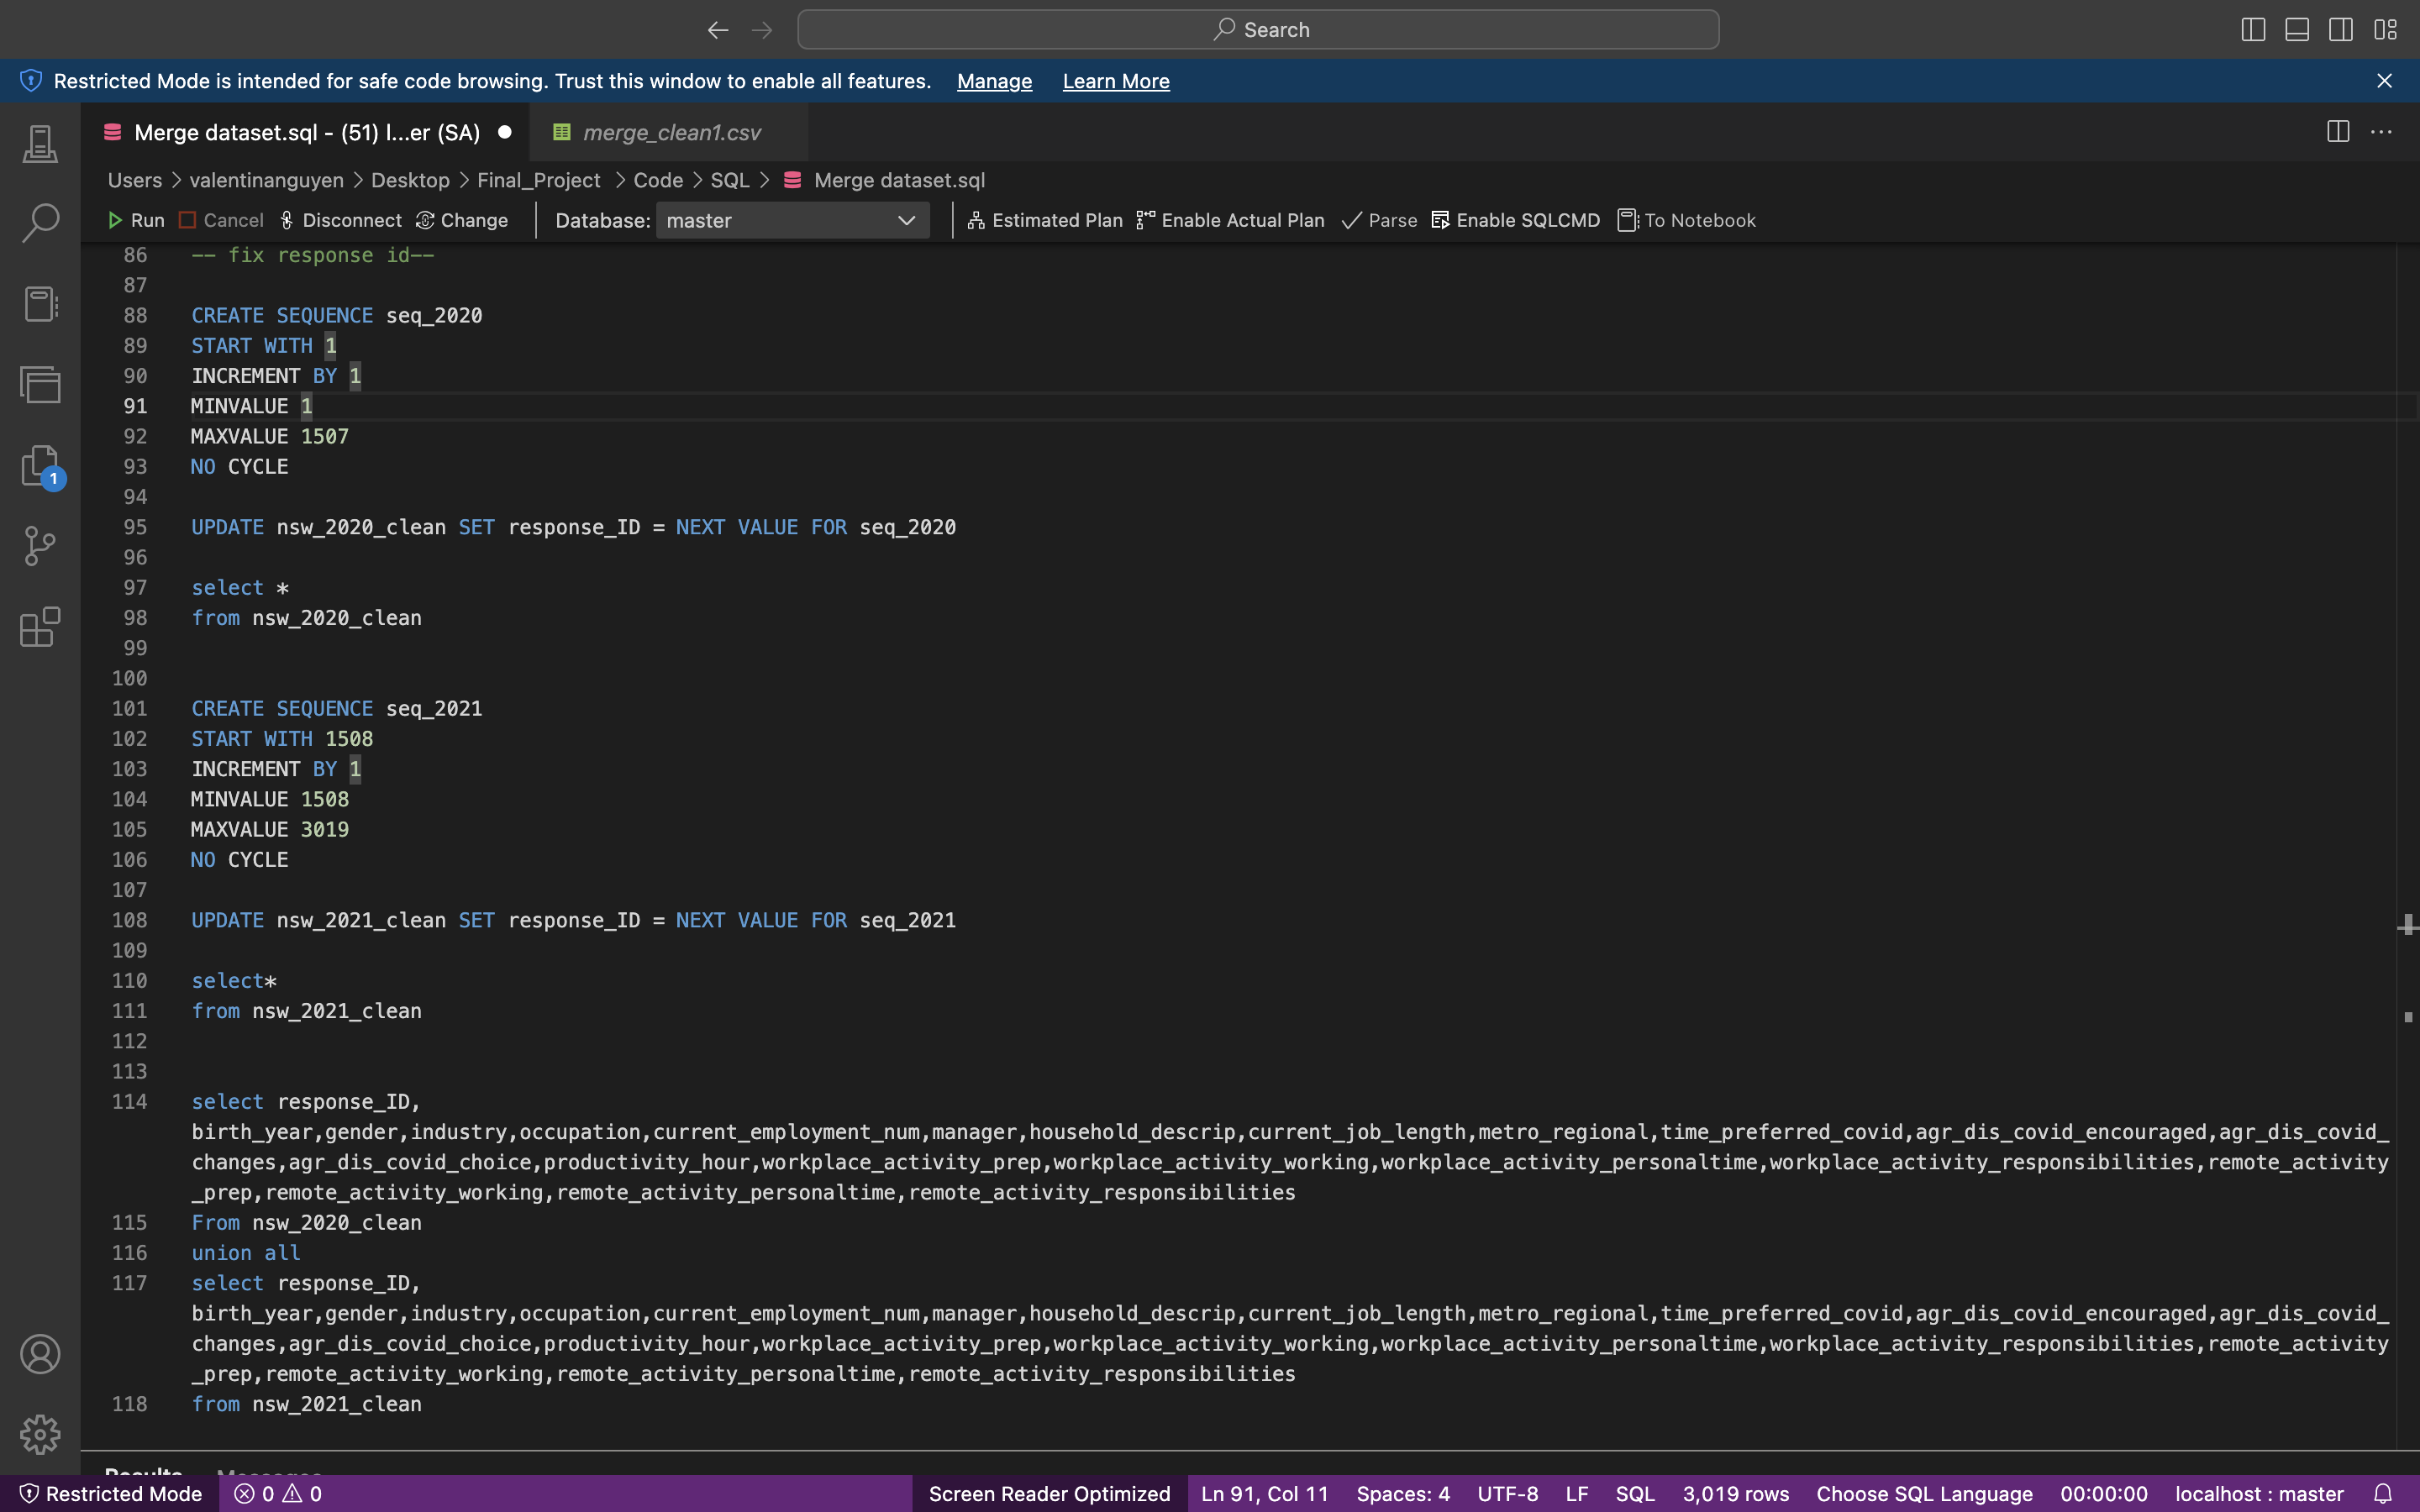


In [ ]:
#read and upload new 2020 csv wit fixed index
nsw_2020_indexupdate = pd.read_csv('/content/drive/MyDrive/School/grad/Spring 24/CPSC 5175/Final Project /Data sets/nsw_2020_clean_resID.csv')
#drop extra column 'column1'
nsw_2020_indexupdate.drop(['column1'], axis=1)
#set the index to response id
nsw_2020_indexupdate.set_index("response_ID", inplace = True)

#read and upload new 2021 csv wit fixed index
nsw_2021_indexupdate = pd.read_csv('/content/drive/MyDrive/School/grad/Spring 24/CPSC 5175/Final Project /Data sets/nsw_2021_clean_rspID.csv')
#drop extra column 'column1'
nsw_2021_indexupdate.drop(['column1'], axis=1)
#set the index to response id
nsw_2021_indexupdate.set_index("response_ID", inplace = True)

In [ ]:
extr_col1 = nsw_2020_indexupdate['remote_last3months']
extr_col2 = nsw_2021_indexupdate['remote_time_2020_Q3']
df.insert(1, "remote_last3months_", extr_col1)
df.insert(1, "remote_time_2020_Q3", extr_col2)

### Replacing Missing Values and Cleaning Columns

In [ ]:
# Replace missing values with "Not Available" in column: 'manager'
df = df.fillna({'manager': "Not Available"})

# Replace missing values with 0 in columns: 'workplace_activity_prep', 'workplace_activity_working' and 6 other columns
df = df.fillna({'workplace_activity_prep': 0, 'workplace_activity_working': 0, 'workplace_activity_personaltime': 0, 'workplace_activity_responsibilities': 0, 'remote_activity_prep': 0, 'remote_activity_working': 0, 'remote_activity_personaltime': 0, 'remote_activity_responsibilities': 0})

In [ ]:
#clean gender column- combine 'I would rather not say', 'Rather not say' and 'Other' to just 'Other'

#dictionary
gender_dict = {'I would rather not say' : 'Other','Rather not say': 'Other'}

#replace
df['gender'].replace(gender_dict,inplace = True)

#clean household column- combine 'I would rather not say', 'Rather not say' and 'Other' to just 'Other'

#dictionary
house_dict = {'One  parent family with dependent children' : 'Single parent household','Other one family household': 'Single parent household','One parent family with dependent children': 'Single parent household'}

#replace
df['household_descrip'].replace(house_dict,inplace = True)

In [ ]:
df

,birth_year,remote_time_2020_Q3,remote_last3months_,gender,industry,occupation,current_employment_num,manager,household_descrip,current_job_length,...,agr_dis_covid_choice,productivity_hour,workplace_activity_prep,workplace_activity_working,workplace_activity_personaltime,workplace_activity_responsibilities,remote_activity_prep,remote_activity_working,remote_activity_personaltime,remote_activity_responsibilities
response_ID,,,,,,,,,,,,,,,,,,,,,
1,1972,NaN,90.0,Female,Manufacturing,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,...,Strongly disagree,50,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0
2,1972,NaN,20.0,Male,Wholesale Trade,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,...,Somewhat agree,-20,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0
3,1982,NaN,50.0,Male,"Electricity, Gas, Water and Waste Services",Managers,More than 200,Yes,Single parent household,More than 5 years,...,Somewhat agree,-10,6.0,1.0,6.0,5.0,5.0,2.0,7.0,7.0
4,1987,NaN,100.0,Female,"Professional, Scientific and Technical Services",Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,...,Somewhat agree,0,1.0,9.0,1.0,2.0,0.0,9.0,3.0,2.0
5,1991,NaN,90.0,Male,"Transport, Postal and Warehousing",Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,...,Strongly disagree,20,1.0,8.0,13.0,2.0,0.0,6.0,15.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,1995,30.0,NaN,Male,Wholesale Trade,"Managers - Chief Executives, General Managers ...",Between 5 and 19,Yes,Couple with dependent children,Between 1 and 5 years,...,Somewhat likely,30,2.0,8.0,3.0,4.0,3.0,8.0,3.0,3.0
3016,1993,10.0,NaN,Female,Health Care and Social Assistance,Professionals - Health Professionals,Between 5 and 19,Yes,Multiple family household,More than 5 years,...,Very unlikely,0,3.0,10.0,2.0,2.0,1.0,8.0,4.0,3.0
3017,1979,0.0,NaN,Female,Administrative and Support,Clerical and administrative workers - Clerical...,Between 20 and 199,No,Single parent household,More than 5 years,...,Very unlikely,0,3.0,7.0,2.0,4.0,1.0,7.0,4.0,4.0


# Exploratory Data Analysis

Most of the analysis will be based off of reported WFH participation for 3 months (2020 and 2021).

## Demographic & Industry

Exploring demographics gives insights on employers tailoring policies to meet specific needs and preferences for different demographic types. For example, understanding the preferences of older generations or young working parents. There are different needs for each age group. Grouping birth years into generational cohorts can provide insights into different age groups and their characteristics. This is useful since the precise birth years are not as important as the overall age distribution. The birth year ranges from 1900-2002. The age categories are labeled as follows:


*   Silent Generation: Born between 1928 and 1945

*   Baby Boomers: Born between 1946 and 1964

*   Generation X: Born between 1965 and 1980

*   Millennials (Generation Y): Born between 1981 and 1996

*   Generation Z: Born between 1997 and 2012


**Note** that the two respondents who were born in 1900 are to be included in the Silent Generation.


### Question 1

What is the demographic composition of respondents? What is the relationship between them?


*   Age
*   House Hold Discription
*   Gender
*   Geographic Location


birth_year
1900      2
1937      1
1945      1
1955      9
1956     29
1957     75
1958     49
1959     60
1960     74
1961     84
1962     70
1963     69
1964     79
1965     67
1966     64
1967     51
1968     62
1969     67
1970     80
1971     81
1972     73
1973     72
1974     63
1975     62
1976     72
1977     91
1978     89
1979     59
1980    106
1981     75
1982     66
1983     82
1984     72
1985    108
1986     79
1987     82
1988     82
1989     85
1990     97
1991     58
1992     59
1993     47
1994     46
1995     64
1996     38
1997     27
1998     23
1999     21
2000     31
2001      9
2002      7
dtype: int64
response_ID
1                  Gen X
2                  Gen X
3       Millenials/Gen Y
4       Millenials/Gen Y
5       Millenials/Gen Y
              ...       
3015    Millenials/Gen Y
3016    Millenials/Gen Y
3017               Gen X
3018               Gen X
3019    Millenials/Gen Y
Name: age_group, Length: 3019, dtype: category
Categories (5, object): ['Sile

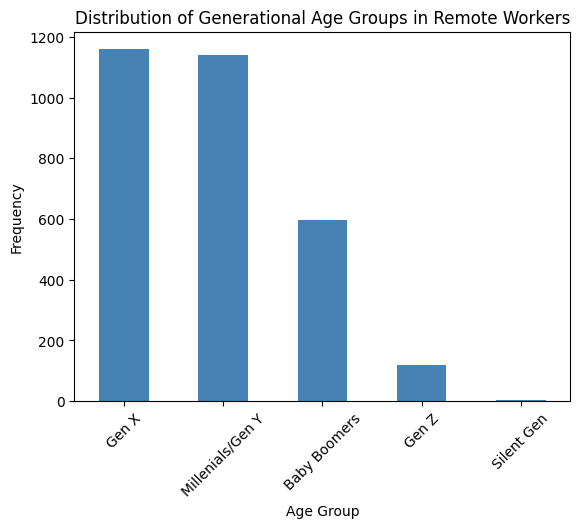

In [ ]:
#Age
#birth_year(generation)
birth = df.pivot_table(index=['birth_year'], aggfunc='size')
print(birth)


#group years into generation age groups
bins = [1899,1945,1964,1980,1996,2002]
labels = ['Silent Gen','Baby Boomers','Gen X','Millenials/Gen Y','Gen Z']
df['age_group'] = pd.cut(x=df['birth_year'], bins = bins,labels = labels)

print(df['age_group'])

age = df.pivot_table(index=['age_group'], aggfunc='size')
print(age)

df.drop('birth_year', axis = 'columns',inplace =True)

age_counts = df['age_group'].value_counts()

#plot hist
age_counts.plot(kind='bar', color='steelblue')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Distribution of Generational Age Groups in Remote Workers')
plt.show()


household_descrip
Couple with dependent children       1118
Couple with no dependent children     918
Group household                       130
Multiple family household              81
Single parent household               253
Single person                         519
dtype: int64
household_descrip
Couple with dependent children       37.032130
Couple with no dependent children    30.407420
Group household                       4.306062
Multiple family household             2.683008
Single parent household               8.380258
Single person                        17.191123
dtype: float64


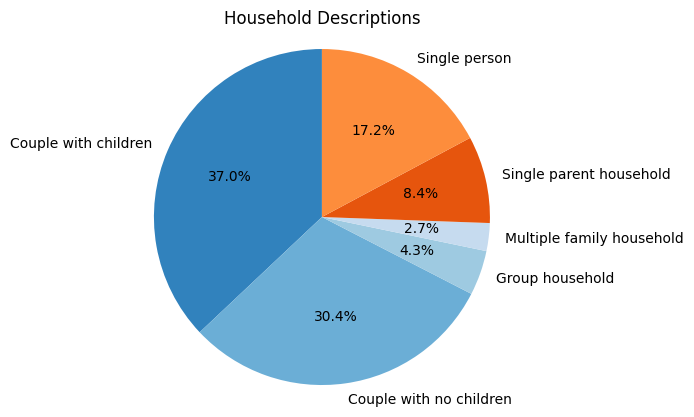

In [ ]:
#Household Discription
house = df.pivot_table(index=['household_descrip'], aggfunc='size')
print(house)

house_percent = house/house.sum() * 100
print(house_percent)


#plt pie
house_key = ['Couple with children','Couple with no children','Group household','Multiple family household','Single parent household','Single person' ]
color = sns.color_palette('tab20c')

plt.pie(house_percent ,labels = house_key, colors=color, autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.title('Household Descriptions')
plt.show()


gender
Female    1443
Male      1570
Other        6
dtype: int64
gender
Female    47.797284
Male      52.003975
Other      0.198741
dtype: float64


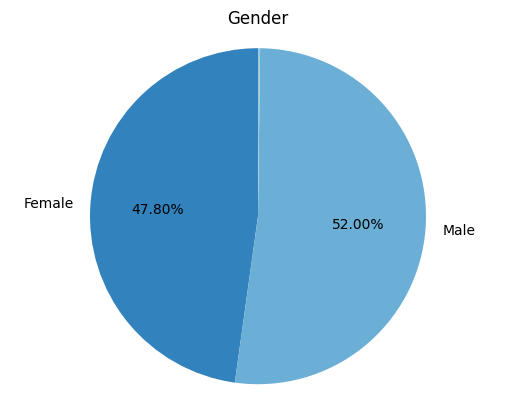

In [ ]:
#gender
gender = df.pivot_table(index=['gender'],aggfunc='size')
print(gender)


gender_percent = gender / gender.sum() * 100
print(gender_percent)


#plot pie chart
gen_key = ['Female','Male','Other']
color = sns.color_palette('tab20c')


#dont show the label that is less than 10%
#autopct:...dont show percentage under 10%
#startangle: rotates the orientation of the pie chart
#plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
plt.pie(gender_percent ,labels = [f"{label}" if percent >= 10 else '' for label, percent in zip(gen_key, gender_percent)],
                          colors=color, autopct=lambda pct: '{:.2f}%'.format(pct) if pct >= 10 else '', startangle=90)
plt.axis('equal')
plt.title('Gender')
plt.show()

metro_regional
Metro       2382
Regional     637
dtype: int64
metro_regional
Metro       78.900298
Regional    21.099702
dtype: float64


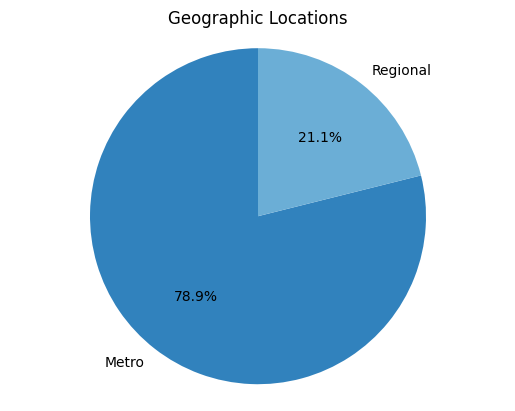

In [ ]:
#Geographic Location
#Metro or regional
geo = df.pivot_table(index=['metro_regional'], aggfunc='size')
print(geo)

geo_percent = geo/geo.sum() * 100
print(geo_percent)


#plt pie
geo_key = ['Metro','Regional']
color = sns.color_palette('tab20c')

plt.pie(geo_percent ,labels = geo_key, colors=color, autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.title('Geographic Locations')
plt.show()

In [118]:
#relationship between demogrpahic info

#Household and Age Group

import plotly.express as px

household_dict = {'Couple with dependent children':'Couple with kids','Couple with no dependent children':'Couple with no kids','Multiple family household':'Multiple family','Single parent household':'Single parent'}
df['household_descrip'].replace(household_dict,inplace = True)

freq_df = df.groupby(['household_descrip','age_group']).size().reset_index(name='frequency')

fig = px.scatter(freq_df,x='household_descrip',y='age_group',size = 'frequency', hover_data='frequency', title='NSW Demographic Information', color='frequency', color_continuous_scale='ice_r')  #_r to reverse color scale
fig.update_layout(xaxis_title='Household Description', yaxis_title='Age Group', font = dict(size=10))
fig.update_xaxes(tickangle=0)
fig.show()


**Age**

Gen X and Gen Y are practically the same and the highest category to report working from home. The Baby Boomers are now leaning towards retirement and exiting the workforce while Gen Z are just entering.

**Household**

Top 3 household types:

Two adult household with children

Two adult household without children

Single adult household

The rest of the categories only represent less than 20% of respondents, where it is unclear as to how they are categorized the way they are.

**Gender**

52% Male

48% Female

**Geographic**

78.9% Metro
21.1% Regional


Out of the 15000 remote worker respondents, the top three respondents fell into Gen X or Millennials (Gen Y) individuals who live in a two-adult household with or without children.

### Question 2

Does age play a role in WFH participation?



age_group            Silent Gen  Baby Boomers  Gen X  Millenials/Gen Y  Gen Z
remote_last3months_                                                          
0.0                           0            11     13                 7      0
10.0                          0            38     67                34      4
20.0                          0            33     48                26      1
30.0                          0            15     30                29      2
40.0                          2            14     26                33      2
50.0                          2            31     43                57      4
60.0                          0            15     21                30      1
70.0                          0             9     25                36      0
80.0                          0            25     37                44      3
90.0                          0            35     63                46      2
100.0                         0           137    245            

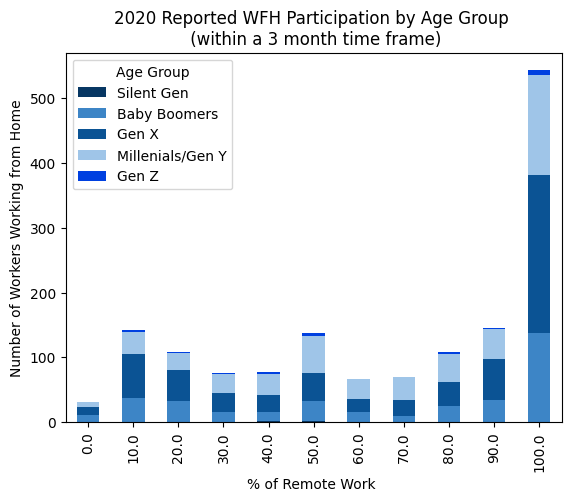

remote_time_2020_Q3
0.0       97
10.0     200
20.0     142
30.0     103
40.0      85
50.0     182
60.0      68
70.0      56
80.0     102
90.0     111
100.0    366
dtype: int64
age_group            Silent Gen  Baby Boomers  Gen X  Millenials/Gen Y  Gen Z
remote_time_2020_Q3                                                          
0.0                           0            20     33                34     10
10.0                          0            41     74                73     12
20.0                          0            20     46                61     15
30.0                          0             7     34                54      8
40.0                          0             7     14                56      8
50.0                          0            24     67                82      9
60.0                          0             4     25                35      4
70.0                          0             8     15                28      5
80.0                          0            1

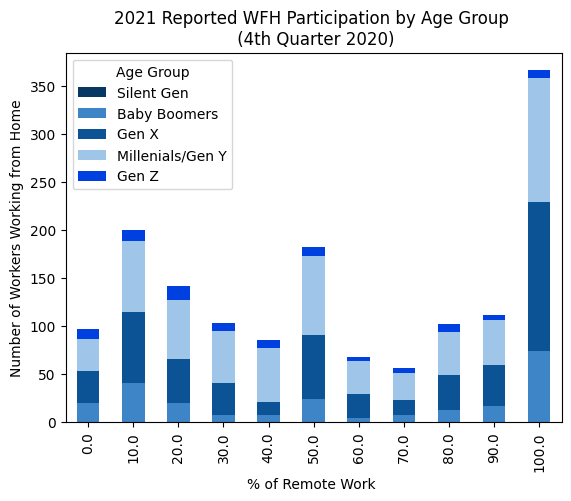

In [131]:
#Age
#birth_year(generation)
##agegroup = df.pivot_table(index=['age_group'], aggfunc='size') the same as age_3m
#print(agegroup)

#2020 pivot table to see how many voted for each percentage
remote_2020_3m = df.pivot_table(index=['remote_last3months_'], aggfunc='size')


#group by age group and 2020 3m to see how many ppl by age group voted for each %
age_3m_20 = df.groupby(['age_group','remote_last3months_']).size().unstack()

#transpose, switch index to % instead of age group
age_3m_20_T = age_3m_20.transpose()
age_3m_20_T.index
print(age_3m_20_T)

colors = ['#073763', '#3d85c6', '#0b5394', '#9fc5e8', '#0040e0']

#plot
age_3m_20_T.plot(kind = 'bar', stacked=True, color=colors)
plt.title('2020 Reported WFH Participation by Age Group \n (within a 3 month time frame)')
plt.xlabel('% of Remote Work ')
plt.ylabel('Number of Workers Working from Home')
plt.legend(title='Age Group')
plt.show()

#2021
remote_2021_3m = df.pivot_table(index=['remote_time_2020_Q3'], aggfunc='size')
print(remote_2021_3m)

age_3m_21 = df.groupby(['age_group','remote_time_2020_Q3']).size().unstack()

age_3m_21_T = age_3m_21.transpose()
age_3m_21_T.index
print(age_3m_21_T)

age_3m_21_T.plot(kind = 'bar', stacked=True,color=colors)
plt.title('2021 Reported WFH Participation by Age Group \n (4th Quarter 2020)')
plt.xlabel('% of Remote Work ')
plt.ylabel('Number of Workers Working from Home')
plt.legend(title='Age Group')
plt.show()

Remote work participation jumps to 39% more people joining the bandwagon and dipping their toes into a completely different working environment in just a few months. These are the people who participate in remote work less than or equal to a standard work day out of a five-day work week (those who voted 0-20%). More people begin to spend more time hybrid working rather than solely remote working or working in-office. This would be equivalent to working from home two to three days a week. Gen Z starts to participate more in 2021, this could be due to the fact that more Gen Zers are starting to work more. Millennials and Gen X are still dominant in the workforce so they take up the majority share.

### Question 3

What is the distriubution of remote work by industry?

industry
Accommodation and Food                       59
Administrative and Support                  146
Agriculture, Forestry and Fishing            23
Arts and Recreation                          73
Construction                                127
Education and Training                      294
Electricity, Gas, Water and Waste            57
Financial and Insurance                     377
Health Care and Social Assistance           219
Information Media and Telecommunications    263
Manufacturing                               149
Mining                                       23
Other Services                              222
Professional, Scientific and Technical      422
Public Administration and Safety            147
Rental, Hiring and Real Estate               47
Retail Trade                                173
Transport, Postal and Warehousing           104
Wholesale Trade                              94
dtype: int64


Text(0.5, 1.0, 'Industries that Utilize Remote Work')

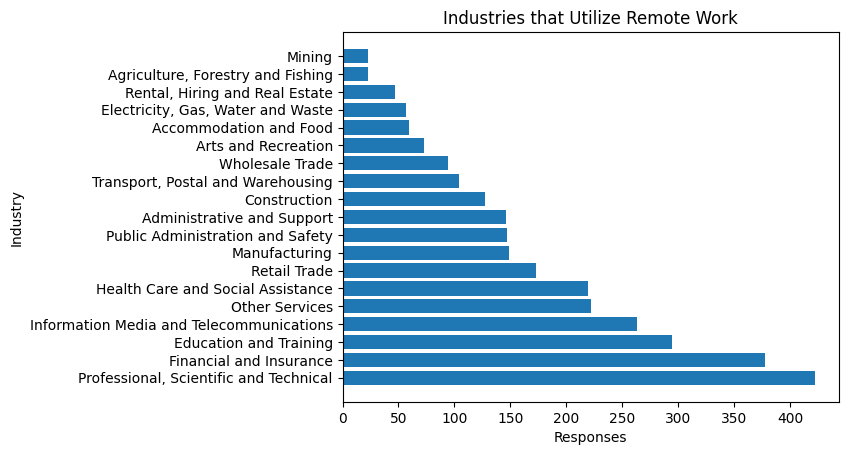

In [119]:
#industry
industry = df.pivot_table(index=['industry'], aggfunc='size')

industry_dict = {'Accommodation and Food Services':'Accommodation and Food','Administrative and Support Services':'Administrative and Support',
                 'Arts and Recreation Services':'Arts and Recreation','Electricity, Gas, Water and Waste Services':'Electricity, Gas, Water and Waste',
                 'Financial and Insurance Services':'Financial and Insurance',
                 'Professional, Scientific and Technical Services':'Professional, Scientific and Technical',
                 'Rental, Hiring and Real Estate Services':'Rental, Hiring and Real Estate' }

#replace
df['industry'].replace(industry_dict,inplace = True)
print(industry)

ind_counts = df['industry'].value_counts()


#plot
plt.barh(ind_counts.index, ind_counts.values)
plt.xlabel('Responses')
plt.ylabel('Industry')
plt.title('Industries that Utilize Remote Work')

### Question 4

Do larger businesses participate more in WFH?

In [87]:
#Employment by Industry -stacked barh
#check pivot table to count no. occurences
emp = df.pivot_table(index=['current_employment_num'], aggfunc='size')
print(emp)
emp_by_ind = df.groupby(['current_employment_num','industry']).size().reset_index(name='freq_ind')
#Sorting and Custom Ordering
 #sorts the DataFrame emp_by_ind by the 'freq_ind' column in descending order.
emp_by_ind = emp_by_ind.sort_values(by = 'freq_ind', ascending = False)
#defines a custom order for the 'current_employment_num' column and converts it to a categorical variable with the specified custom order.
custom_order = ['I am a sole trader/owner-operator','I am the only employee','Between 1 and 4','Between 5 and 19','Between 20 and 199','More than 200']
emp_by_ind['current_employment_num'] = pd.Categorical(emp_by_ind['current_employment_num'], categories=custom_order, ordered=True)
#sorts the DataFrame by the 'current_employment_num' column based on the custom order.
emp_by_ind = emp_by_ind.sort_values(by='current_employment_num')


#pivot table for plotting
pivot_data = emp_by_ind.pivot(index='industry', columns='current_employment_num', values='freq_ind')
emp_by_ind


#plt interactive plot
fig = px.bar(emp_by_ind, x='freq_ind', y='industry', color='current_employment_num', title='Company Size by Industry', color_continuous_scale=px.colors.sequential.Viridis,
            labels={'freq_ind': 'Number of Employment Size', 'industry': 'Industry'},
             orientation='h', barmode='stack', text='freq_ind', width=1500, height=600)

fig.update_layout(xaxis=dict(title='Company Count'),
                 yaxis=dict(title='Industry'), legend_title='Company Size', legend=dict(x=1.05, y=0.5))


# Show the plot
fig.show()

current_employment_num
Between 1 and 4                       172
Between 20 and 199                    825
Between 5 and 19                      418
I am a sole trader/owner-operator      50
I am the only employee                 63
More than 200                        1491
dtype: int64


The top 3 Industries that utilize a remote work policy are Professional, Scientific and Technical, Financial and Insurance, and Education and Training. These top industries have over 500 companies that have more than 200 employees.

## Productivity & Time-Use

### Question 1

What is the change of perception of remote work barriers compared to both years?

In [ ]:
#extract unique values
#2020
  #focus on the remote barrier columns
remote_barriers_20_col= nsw_2020_indexupdate[['remote_barrier_1','remote_barrier_2','remote_barrier_3','remote_barrier_4','remote_barrier_5',
                                   'remote_barrier_6','remote_barrier_7','remote_barrier_8','remote_barrier_9','remote_barrier_10','remote_barrier_11',
                                   'remote_barrier_12','remote_barrier_13','remote_barrier_14','remote_barrier_15','remote_barrier_16','remote_barrier_17',
                                   'remote_barrier_18','remote_barrier_19','remote_barrier_20']].copy()

  #create an empty set list to store unique values
unique_values_20 = set()
  #for loop: iterate over each column and update unique values set
for col in remote_barriers_20_col.columns:
  unique_values_20.update(remote_barriers_20_col[col].unique())

  #create a DF with the unique values
remote_barriers_20_uniq = pd.DataFrame({'Unique Values 2020': list(unique_values_20)})
remote_barriers_20_uniq

,Unique Values 2020
0,"My workspace (e.g. suitable chair, lighting, n..."
1,"IT equipment (computer, printer, etc.)"
2,Difficulty collaborating remotely
3,Poor management
4,Lack of remote working skills
5,Connectivity (internet connection)
6,Feeling left out and/or isolated
7,My organisation's software and systems
8,"My living situation (e.g. location, home size,..."
9,I have tasks that can't be done remotely


In [ ]:
#2020 barriers count
#empty dict
total_freq = {}

    # Create pivot table to calculate frequency of each category in the column
for column in remote_barriers_20_col.columns:
  pivot_table = remote_barriers_20_col.pivot_table(index = column, aggfunc={column:'size'})
# for each row(category) iterate through each and read if it is in the total_freq dict
  for category, frequency in pivot_table.iterrows():
#if it is, add it to the total
    if category in total_freq:
      total_freq[category] += frequency[column]
#else, add the entry to the dict
    else:
      total_freq[category] = frequency[column]

#print total freq for each category
for category,  total_freq in total_freq.items():
  print('Category: ', category)
  print('Freq: ' , total_freq)

Category:  Caring responsibilities
Freq:  2338
Category:  Connectivity (internet connection)
Freq:  2215
Category:  Difficulty collaborating remotely
Freq:  2383
Category:  Feeling left out and/or isolated
Freq:  2696
Category:  IT equipment (computer, printer, etc.)
Freq:  2227
Category:  Poor management
Freq:  1568
Category:  Cyber security
Freq:  1520
Category:  Lack of motivation
Freq:  4617
Category:  I have tasks that can't be done remotely
Freq:  1817
Category:  My organisation's software and systems
Freq:  1216
Category:  My workspace (e.g. suitable chair, lighting, noise levels, facilities)
Freq:  1864
Category:  Lack of remote working skills
Freq:  1408
Category:  Management discourages remote working
Freq:  2098
Category:  My living situation (e.g. location, home size, who I live with)
Freq:  2173


In [ ]:
remote_barriers_20_col = nsw_2020_indexupdate[['remote_barrier_1','remote_barrier_2','remote_barrier_3',
                                               'remote_barrier_4','remote_barrier_5','remote_barrier_6',
                                               'remote_barrier_7','remote_barrier_8','remote_barrier_9',
                                               'remote_barrier_10','remote_barrier_11','remote_barrier_12',
                                               'remote_barrier_13','remote_barrier_14','remote_barrier_15',
                                               'remote_barrier_16','remote_barrier_17','remote_barrier_18','remote_barrier_19','remote_barrier_20']].copy()



#initalize lists to hold most signifcant and least signicant barrier columns
most_sig_bar = ['remote_barrier_1','remote_barrier_3','remote_barrier_5','remote_barrier_7','remote_barrier_9','remote_barrier_11',
                'remote_barrier_13','remote_barrier_15','remote_barrier_17','remote_barrier_19']
least_sig_bar = ['remote_barrier_2','remote_barrier_4','remote_barrier_6','remote_barrier_8','remote_barrier_10','remote_barrier_12',
                'remote_barrier_14','remote_barrier_16','remote_barrier_18','remote_barrier_20']

#create seperate df
most_sig_df = remote_barriers_20_col[most_sig_bar]
least_sig_df = remote_barriers_20_col[least_sig_bar]

#calc freq for each category within subsets
most_sig_freq = most_sig_df.apply(pd.Series.value_counts)
least_sig_freq = least_sig_df.apply(pd.Series.value_counts)

In [ ]:
print(most_sig_freq)

                                                    remote_barrier_1  \
Caring responsibilities                                        130.0   
Connectivity (internet connection)                             257.0   
Cyber security                                                   NaN   
Difficulty collaborating remotely                              273.0   
Feeling left out and/or isolated                               386.0   
I have tasks that can't be done remotely                         NaN   
IT equipment (computer, printer, etc.)                         263.0   
Lack of motivation                                               NaN   
Lack of remote working skills                                    NaN   
Management discourages remote working                            NaN   
My living situation (e.g. location, home size, ...               NaN   
My organisation's software and systems                           NaN   
My workspace (e.g. suitable chair, lighting, no...              

In [ ]:
print(least_sig_freq)

                                                    remote_barrier_2  \
Caring responsibilities                                        365.0   
Connectivity (internet connection)                             261.0   
Cyber security                                                   NaN   
Difficulty collaborating remotely                              143.0   
Feeling left out and/or isolated                               275.0   
I have tasks that can't be done remotely                         NaN   
IT equipment (computer, printer, etc.)                         239.0   
Lack of motivation                                               NaN   
Lack of remote working skills                                    NaN   
Management discourages remote working                            NaN   
My living situation (e.g. location, home size, ...               NaN   
My organisation's software and systems                           NaN   
My workspace (e.g. suitable chair, lighting, no...              

In [ ]:
# Extract the maximum value from each column in the DataFrame
max_index_most_sig = most_sig_freq.idxmax()
max_index_least_sig = least_sig_freq.idxmax()
max_values_most_sig = most_sig_freq.max()
max_values_least_sig = least_sig_freq.max()

print("Maximum values for most significant barriers:")
print(max_index_most_sig)
print(max_values_most_sig)
print("\nMaximum values for least significant barriers:")
print(max_index_least_sig)
print(max_values_least_sig)

Maximum values for most significant barriers:
remote_barrier_1             Feeling left out and/or isolated
remote_barrier_3             Feeling left out and/or isolated
remote_barrier_5     I have tasks that can't be done remotely
remote_barrier_7             Feeling left out and/or isolated
remote_barrier_9                           Lack of motivation
remote_barrier_11    I have tasks that can't be done remotely
remote_barrier_13           Difficulty collaborating remotely
remote_barrier_15       Management discourages remote working
remote_barrier_17                          Lack of motivation
remote_barrier_19                          Lack of motivation
dtype: object
remote_barrier_1     386.0
remote_barrier_3     422.0
remote_barrier_5     397.0
remote_barrier_7     436.0
remote_barrier_9     467.0
remote_barrier_11    406.0
remote_barrier_13    468.0
remote_barrier_15    444.0
remote_barrier_17    584.0
remote_barrier_19    749.0
dtype: float64

Maximum values for least significa

Caring responsibilities                                                    708.0
Connectivity (internet connection)                                        1155.0
Cyber security                                                             815.0
Difficulty collaborating remotely                                         1763.0
Feeling left out and/or isolated                                          1561.0
I have tasks that can't be done remotely                                  1071.0
IT equipment (computer, printer, etc.)                                    1299.0
Lack of motivation                                                        2211.0
Lack of remote working skills                                              516.0
Management discourages remote working                                     1106.0
My living situation (e.g. location, home size, who I live with)            919.0
My organisation's software and systems                                     480.0
My workspace (e.g. suitable 

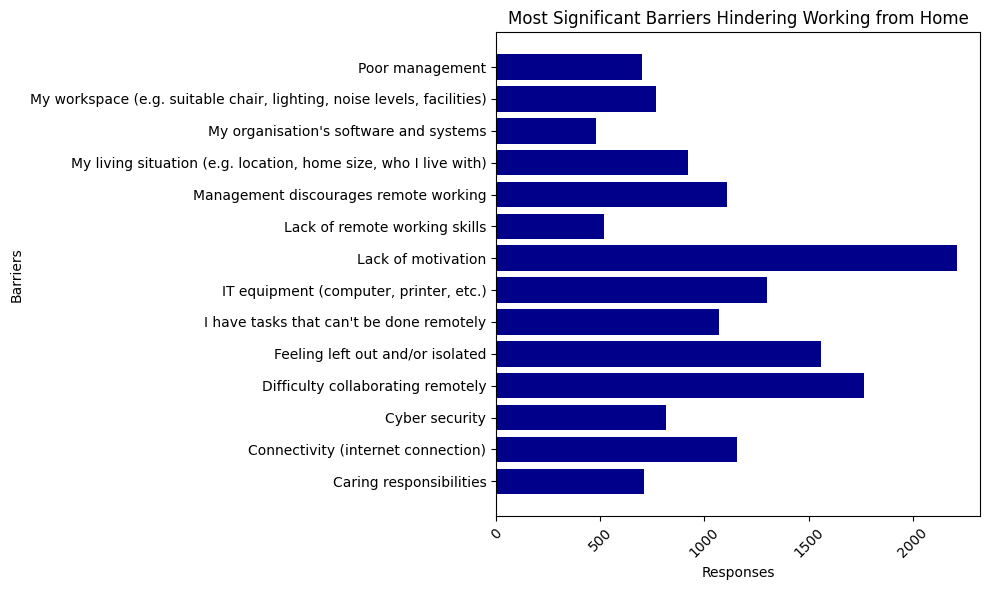

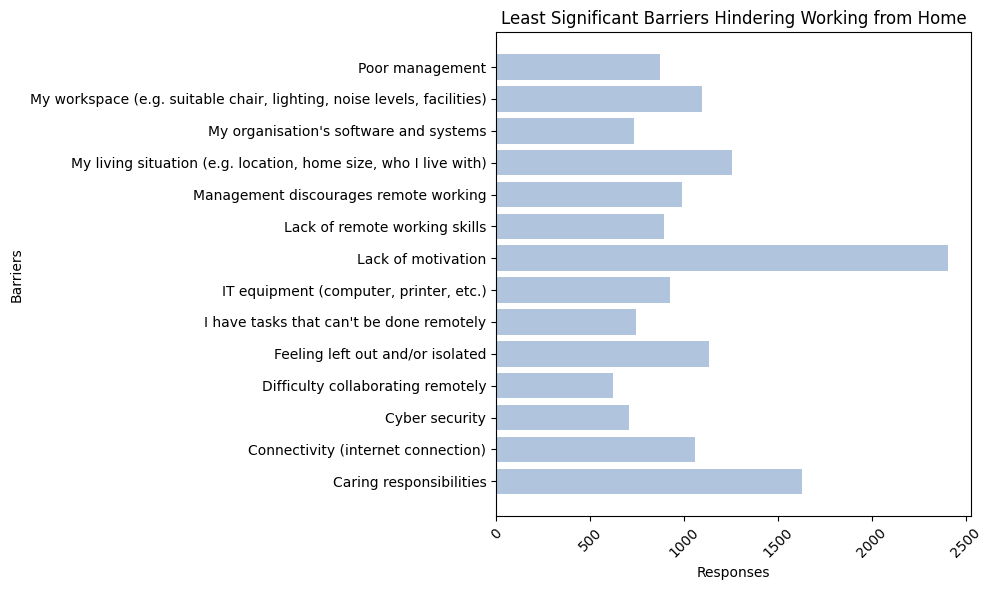

In [121]:
# Sum the frequencies across all barriers within each category
most_sig_freq_sum = most_sig_freq.sum(axis=1)
least_sig_freq_sum = least_sig_freq.sum(axis=1)

print(most_sig_freq_sum)
print(least_sig_freq_sum)

# Plot for most significant barriers
plt.figure(figsize=(10, 6))
plt.barh(most_sig_freq_sum.index, most_sig_freq_sum.values, label='Most Significant Barriers', color = 'darkblue')
plt.title('Most Significant Barriers Hindering Working from Home')
plt.xlabel('Responses')
plt.ylabel('Barriers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for least significant barriers
plt.figure(figsize=(10, 6))
plt.barh(least_sig_freq_sum.index, least_sig_freq_sum.values, color='lightsteelblue', label='Least Significant Barriers')
plt.title('Least Significant Barriers Hindering Working from Home')
plt.xlabel('Responses')
plt.ylabel('Barriers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

{'remote_barriers_improvement_1': remote_barriers_improvement_1
Stayed about the same    546
Improved                 425
Not a barrier for me     404
Worsened                 137
Name: count, dtype: int64, 'remote_barriers_improvement_2': remote_barriers_improvement_2
Stayed about the same    598
Improved                 418
Not a barrier for me     294
Worsened                 202
Name: count, dtype: int64, 'remote_barriers_improvement_3': remote_barriers_improvement_3
Stayed about the same    613
Improved                 497
Not a barrier for me     234
Worsened                 168
Name: count, dtype: int64, 'remote_barriers_improvement_4': remote_barriers_improvement_4
Stayed about the same    517
Improved                 471
Not a barrier for me     263
Worsened                 261
Name: count, dtype: int64, 'remote_barriers_improvement_5': remote_barriers_improvement_5
Stayed about the same    609
Not a barrier for me     336
Improved                 332
Worsened                 

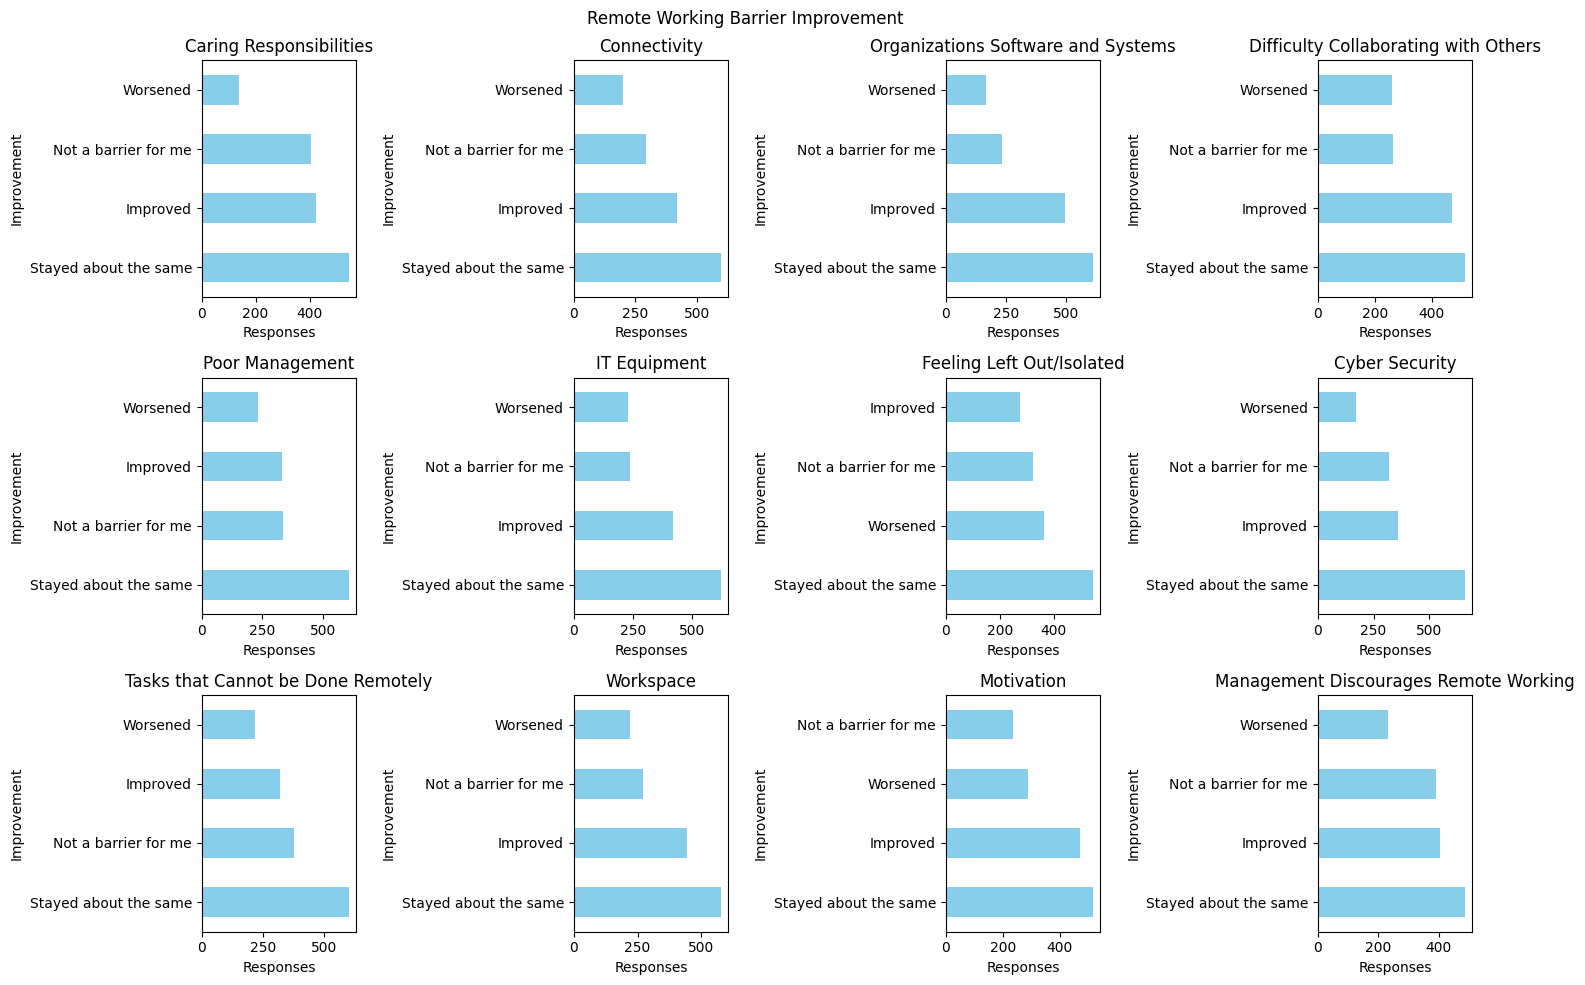

In [91]:
#barrier improvement
  #make new df
remote_barriers_21_col = nsw_2021_indexupdate[['remote_barriers_improvement_1','remote_barriers_improvement_2','remote_barriers_improvement_3',
                                               'remote_barriers_improvement_4','remote_barriers_improvement_5','remote_barriers_improvement_6',
                                               'remote_barriers_improvement_7','remote_barriers_improvement_8','remote_barriers_improvement_9',
                                               'remote_barriers_improvement_10','remote_barriers_improvement_11','remote_barriers_improvement_12',
                                               'remote_barriers_improvement_13','remote_barriers_improvement_14','remote_barriers_improvement_15',
                                               'remote_barriers_improvement_16']].copy()

remove_col =  ['remote_barriers_improvement_8',
               'remote_barriers_improvement_16']
remote_barriers_21_col.drop(columns = remove_col, inplace =True)

#replacements
barrier_improv_dict = {'Significantly improved':'Improved','Somewhat improved': 'Improved', 'Significantly worsened':'Worsened','Somewhat worsened':'Worsened'}

remote_barriers_21_col.replace(barrier_improv_dict,inplace = True)


#pivot tables for each column
pivot_tables = {}
for column in remote_barriers_21_col.columns:
  pivot_table = remote_barriers_21_col[column].value_counts()
  pivot_tables[column] = pivot_table

print(pivot_tables)


#plot
figure, axes = plt.subplots(3, 4, figsize = (15, 10))
figure.suptitle('Remote Working Barrier Improvement')

#rename columns
column_names_mapping = {'remote_barriers_improvement_1': 'Caring Responsibilities',
                        'remote_barriers_improvement_2':'Connectivity',
                        'remote_barriers_improvement_3':'Organizations Software and Systems',
                        'remote_barriers_improvement_4':'Difficulty Collaborating with Others',
                        'remote_barriers_improvement_5':'Poor Management',
                        'remote_barriers_improvement_6':'IT Equipment',
                        'remote_barriers_improvement_7':'Feeling Left Out/Isolated',
                        'remote_barriers_improvement_9':'Cyber Security',
                        'remote_barriers_improvement_10':'Tasks that Cannot be Done Remotely',
                        'remote_barriers_improvement_11':'Workspace',
                        'remote_barriers_improvement_12':'Motivation',
                        'remote_barriers_improvement_13':'Management Discourages Remote Working',
                        'remote_barriers_improvement_14':'Living Situation',
                        'remote_barriers_improvement_15':'Lack of Remote Working Skills'}

num_columns = min(len(remote_barriers_21_col.columns), 12)
for i in range(num_columns):
    column = remote_barriers_21_col.columns[i]
    pivot_table = remote_barriers_21_col[column].value_counts()
    row = i // 4
    col = i % 4
    pivot_table.plot(kind='barh', ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(column_names_mapping.get(column, column))
    axes[row, col].set_xlabel('Responses')
    axes[row, col].set_ylabel('Improvement')

plt.tight_layout()


 Interestingly enough, respondents thought lack of motivation was the most and the least significant barrier. This could be due to differences in strength in mental focus of being in the comfort of their own homes and the industry you work in. The top 3 most significant barriers are Lack of Motivation, Difficulty Collaborating Remotely, and Feeling Left Out/Isolated. The top 3 least significant barriers are Lack of Motivation, Caring Responsibilities, and Living Situations.

 31% of respondents thought the barrier to collaborating with others had improved after some time had passed from the height of COVID-19, getting the kinks out of working with technology and how we communicate in a new working environment. About the same amount of respondents elected for their feelings of lack of motivation stayed the same or had improved. 24% of respondents claimed that their feeling of being isolated had worsened as time went on in continuing to work remotely.


### Question 2

How did respondents perceive their productivity while working remotely vs how management preceived their employees productivity?

In [ ]:
#revert back to og productivity_hour_management, not regex.
nsw_2021['productivity_hour_management']

1508                                                  0.0
1509                                                  0.0
1510                                                  0.0
1511                                                  0.0
1512                                                  NaN
                              ...                        
3015        I�m 30% more productive when working remotely
3016    My productivity is about same when I work remo...
3017                                                  NaN
3018    My productivity is about same when I work remo...
3019                                                  NaN
Name: productivity_hour_management, Length: 1512, dtype: object

In [ ]:
#add productivity_hour_management to df
extr_col3 = nsw_2021['productivity_hour_management']
df.insert(15, "productivity_hour_management", extr_col3)

In [ ]:
df

,remote_time_2020_Q3,remote_last3months_,gender,industry,occupation,current_employment_num,manager,household_descrip,current_job_length,metro_regional,...,productivity_hour_management,workplace_activity_prep,workplace_activity_working,workplace_activity_personaltime,workplace_activity_responsibilities,remote_activity_prep,remote_activity_working,remote_activity_personaltime,remote_activity_responsibilities,age_group
response_ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,90.0,Female,Manufacturing,Clerical and administrative,Between 20 and 199,No,Couple with no kids,More than 5 years,Regional,...,NaN,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0,Gen X
2,NaN,20.0,Male,Wholesale Trade,Managers,Between 1 and 4,Yes,Couple with kids,More than 5 years,Metro,...,NaN,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0,Gen X
3,NaN,50.0,Male,"Electricity, Gas, Water and Waste",Managers,More than 200,Yes,Single parent,More than 5 years,Metro,...,NaN,6.0,1.0,6.0,5.0,5.0,2.0,7.0,7.0,Millenials/Gen Y
4,NaN,100.0,Female,"Professional, Scientific and Technical",Professionals,Between 20 and 199,No,Couple with kids,Between 1 and 5 years,Metro,...,NaN,1.0,9.0,1.0,2.0,0.0,9.0,3.0,2.0,Millenials/Gen Y
5,NaN,90.0,Male,"Transport, Postal and Warehousing",Managers,Between 5 and 19,Yes,Couple with no kids,More than 5 years,Metro,...,NaN,1.0,8.0,13.0,2.0,0.0,6.0,15.0,3.0,Millenials/Gen Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,30.0,NaN,Male,Wholesale Trade,"Managers - Chief Executives, General Managers ...",Between 5 and 19,Yes,Couple with kids,Between 1 and 5 years,Metro,...,I�m 30% more productive when working remotely,2.0,8.0,3.0,4.0,3.0,8.0,3.0,3.0,Millenials/Gen Y
3016,10.0,NaN,Female,Health Care and Social Assistance,Professionals - Health Professionals,Between 5 and 19,Yes,Multiple family,More than 5 years,Metro,...,My productivity is about same when I work remo...,3.0,10.0,2.0,2.0,1.0,8.0,4.0,3.0,Millenials/Gen Y
3017,0.0,NaN,Female,Administrative and Support,Clerical and administrative workers - Clerical...,Between 20 and 199,No,Single parent,More than 5 years,Regional,...,NaN,3.0,7.0,2.0,4.0,1.0,7.0,4.0,4.0,Gen X


In [ ]:
#clean productivity_hour_management
prod_mngr_cl = df.pivot_table(index = 'productivity_hour_management', aggfunc='size')
print(prod_mngr_cl)

productivity_hour_management
0.0                                                           4
I�m 10% less productive when working remotely                27
I�m 10% more productive when working remotely                69
I�m 20% less productive when working remotely                33
I�m 20% more productive when working remotely               114
I�m 30% less productive when working remotely                17
I�m 30% more productive when working remotely               117
I�m 40% less productive when working remotely                 4
I�m 40% more productive when working remotely                73
I�m 50% less productive when working remotely (or worse)      6
I�m 50% more productive when working remotely (or more)     124
My productivity is about same when I work remotely          112
dtype: int64


In [ ]:
#pattern for regex
productivity_pattern = r'(\d+(?:\.\d+)?)%\s*(more|less)'

for productivity_hour_management in ['productivity_hour_management']:


#empty dict to store etracted percenetages
  percentages6 = []

#for each element(i) in the column
for i in df['productivity_hour_management']:
  if isinstance(i, str):
    #use regex to extract the numerix part of the string
    match = re.search(productivity_pattern,i)

    if match:
        #extract numeric part of string and convert to float
        #note: 'less than 10% of my time' turns into just 10.00
        #note: completely skips over 'I would not have preferred to work remotely'
        numeric_part = float(match.group(1))
        # Check if the context is 'less', make negative if so
        if match.group(2) == 'less':
          numeric_part = - numeric_part
        percentages6.append(numeric_part)
    else:
      percentages6.append(0)  # If the string does not match the regex pattern, make it 0
  else: percentages6.append(float('nan'))   # Handle non-string elements as Nan
print(percentages6)


# Convert the list of percentages to a pandas Series and change its type to float16
percentages_series_productivity_hour_management = pd.Series(percentages6, dtype='object')

# Update the original column with the new values
df.update({'productivity_hour_management': percentages_series_productivity_hour_management})

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [ ]:
#remove strings, keep it to numeric only
df['productivity_hour_management'] = pd.to_numeric(df['productivity_hour_management'], errors='coerce')
#reprint the prod_mngr_cl pivot table to double check
prod_mngr_cl = df.pivot_table(index = 'productivity_hour_management', aggfunc='size')
print(prod_mngr_cl)

productivity_hour_management
-50.0      6
-40.0      4
-30.0     17
-20.0     33
-10.0     27
 0.0     116
 10.0     69
 20.0    114
 30.0    117
 40.0     73
 50.0    124
dtype: int64


productivity_hour
-50     50
-40     17
-30     81
-20    164
-10    168
 0     767
 10    212
 20    437
 30    430
 40    195
 50    498
dtype: int64


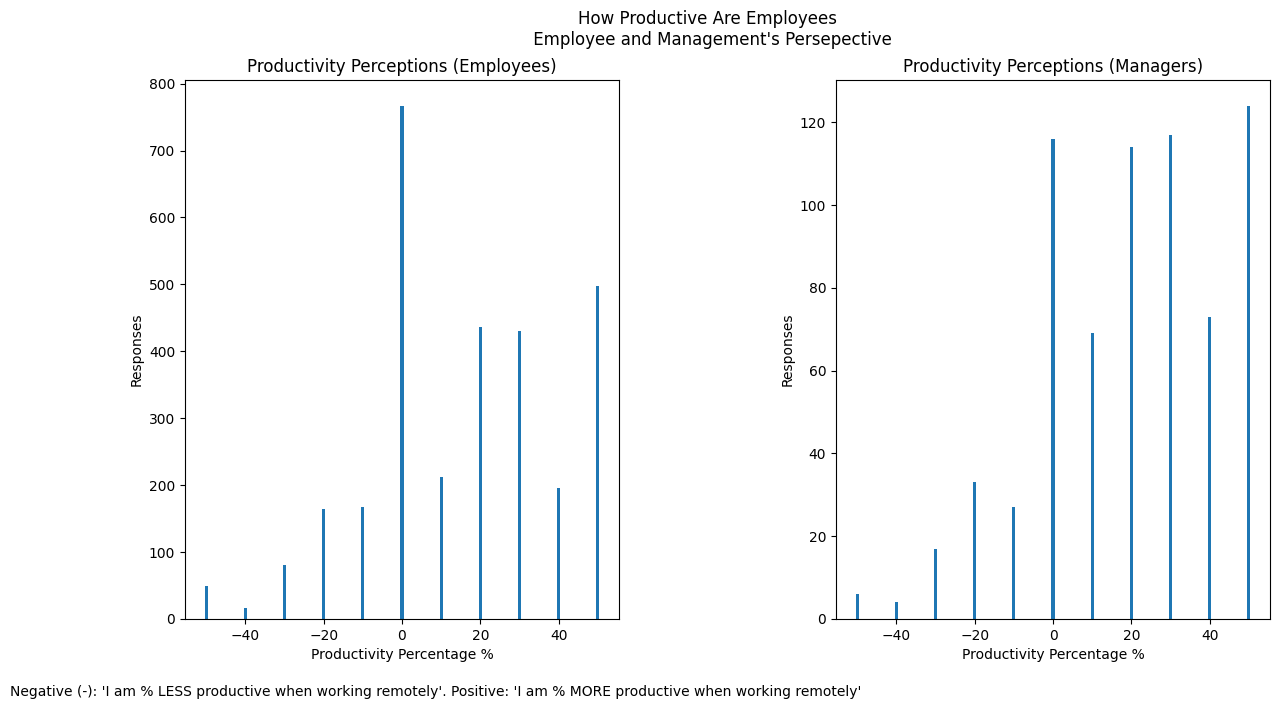

In [123]:
#productivity_hour (df)
productivity = df.pivot_table(index= 'productivity_hour', aggfunc='size')
print(productivity)

#plot productivity perceptions w/ subplots

fig, axs = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns
fig.suptitle("How Productive Are Employees \n Employee and Management's Persepective")

# Plot productivity perceptions for employees
axs[0].bar(productivity.index, productivity.values)
axs[0].set_title('Productivity Perceptions (Employees)')
axs[0].set_xlabel('Productivity Percentage %')
axs[0].set_ylabel('Responses')

# Plot productivity perceptions for managers
axs[1].bar(prod_mngr_cl.index, prod_mngr_cl.values)
axs[1].set_title('Productivity Perceptions (Managers)')
axs[1].set_xlabel('Productivity Percentage %')
axs[1].set_ylabel('Responses')

fig.text(0,0, "Negative (-): 'I am % LESS productive when working remotely'. Positive: 'I am % MORE productive when working remotely'")

plt.subplots_adjust(wspace=0.5)

In [ ]:
#2021
#agr_dis_last6months_encouraged-Thinking about remote working in the last 6 months, how strongly do you agree or disagree
  #with the following statements? Please select a single response per row - My organisation
  #encouraged people to work remotely
#remote_support-Who is most supportive of remote working in your organisation?

In [ ]:
agr_dis_enco_21 = nsw_2021_indexupdate.pivot_table(index='agr_dis_last6months_encouraged', aggfunc='size')
print(agr_dis_enco_21)

support = nsw_2021_indexupdate.pivot_table(index='remote_support',aggfunc='size')
print(support)

agr_dis_last6months_encouraged
Neither agree nor disagree    315
Somewhat agree                471
Somewhat disagree             139
Strongly agree                478
Strongly disagree             109
dtype: int64
remote_support
My direct manger(s)        384
Senior leadership          249
They are about the same    879
dtype: int64


Looking at the productvity_hour column in 2020 and 2021, the question asks respondents to compare their productivity when they work remotely to when they work at their employerís workplace and roughly give a measurement to their productivity each hour. Respondents responded by a percentage if they were more or less productive when they worked remotely. Note that there were far fewer manager respondents than there were employees. This can result in a biased observation if not carefully considered and noted.

The above graph shows that employees think of themselves to be more or the same amount of being productive overall when working remotely. Management seems to reflect this as well. The question represented the quality and the amount of work done each hour. In general, direct management and senior leadership support working remotely and over 60% of employees report that their organizations even encourage remote working.  


### Question 3

How do workers use their time (time spent in and out of the office) during the day when they are working at home vs in the office?


In [ ]:
#remote activity 2020 - remote_activity
remote_activities_20_col = nsw_2020_indexupdate[['remote_activity_prep','remote_activity_working','remote_activity_personaltime','remote_activity_responsibilities']].copy()

#workplace activity 2020 - workplace_activity_prep
wp_activities_20_col = nsw_2020_indexupdate[['workplace_activity_prep','workplace_activity_working','workplace_activity_personaltime','workplace_activity_responsibilities']].copy()

#remote activity 2021
remote_activities_21_col = nsw_2021_indexupdate[['remote_activity_prep','remote_activity_working','remote_activity_personaltime','remote_activity_responsibilities']].copy()

#workplace activity 2021
wp_activities_21_col = nsw_2021_indexupdate[['workplace_activity_prep','workplace_activity_working','workplace_activity_personaltime','workplace_activity_responsibilities']].copy()

Text(0.5, 0, 'Frequency')

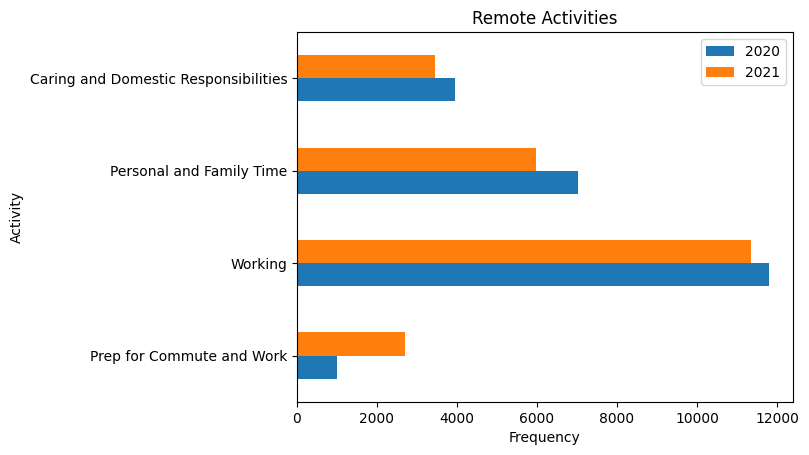

In [ ]:
r20 =remote_activities_20_col.sum().values
wp20 =wp_activities_20_col.sum().values
r21 = remote_activities_21_col.sum().values
wp21 = wp_activities_21_col.sum().values

activities = ['Prep for Commute and Work','Working','Personal and Family Time','Caring and Domestic Responsibilities']

remote_activities = pd.DataFrame({'2020': r20,'2021':wp20}, index = activities)

#plot freq
remote_activities.plot(kind='barh')
plt.title('Remote Activities')
plt.ylabel('Activity')
plt.xlabel('Frequency')

Text(0, 0.5, 'Frequency')

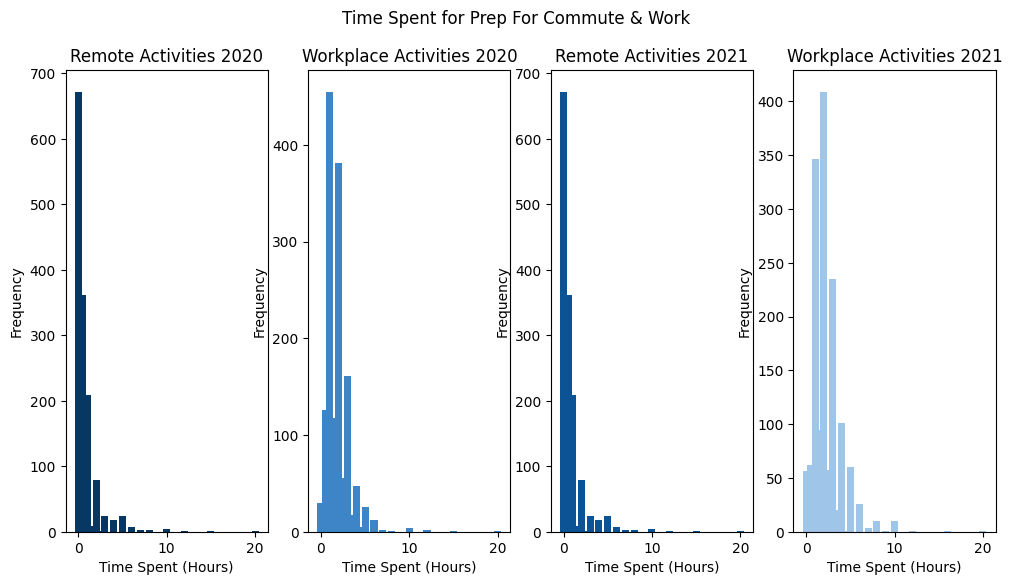

In [132]:
#plot: show hrs spent on each activity from remote and workplace in each year (subplots)

  #prep

activities_20_col = nsw_2020_indexupdate[['remote_activity_prep','remote_activity_working','remote_activity_personaltime','remote_activity_responsibilities','workplace_activity_prep','workplace_activity_working','workplace_activity_personaltime','workplace_activity_responsibilities']].copy()
activities_21_col = nsw_2021_indexupdate[['remote_activity_prep','remote_activity_working','remote_activity_personaltime','remote_activity_responsibilities','workplace_activity_prep','workplace_activity_working','workplace_activity_personaltime','workplace_activity_responsibilities']].copy()

remote_prep_20 = activities_20_col.pivot_table(index='remote_activity_prep', aggfunc='size')
remote_prep_21 = activities_21_col.pivot_table(index='remote_activity_prep', aggfunc='size')

wp_prep_20 = activities_20_col.pivot_table(index='workplace_activity_prep', aggfunc='size')
wp_prep_21 = activities_21_col.pivot_table(index='workplace_activity_prep', aggfunc='size')

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))

fig.suptitle('Time Spent for Prep For Commute & Work')

axes[0].bar(remote_prep_20.index, remote_prep_20.values, color ='#073763')
axes[0].set_title('Remote Activities 2020')
axes[0].set_xlabel('Time Spent (Hours)')
axes[0].set_ylabel('Frequency')

axes[1].bar(wp_prep_20.index, wp_prep_20.values, color ='#3d85c6')
axes[1].set_title('Workplace Activities 2020')
axes[1].set_xlabel('Time Spent (Hours)')
axes[1].set_ylabel('Frequency')

axes[2].bar(remote_prep_20.index, remote_prep_20.values, color ='#0b5394')
axes[2].set_title('Remote Activities 2021')
axes[2].set_xlabel('Time Spent (Hours)')
axes[2].set_ylabel('Frequency')

axes[3].bar(wp_prep_21.index, wp_prep_21.values, color ='#9fc5e8')
axes[3].set_title('Workplace Activities 2021')
axes[3].set_xlabel('Time Spent (Hours)')
axes[3].set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

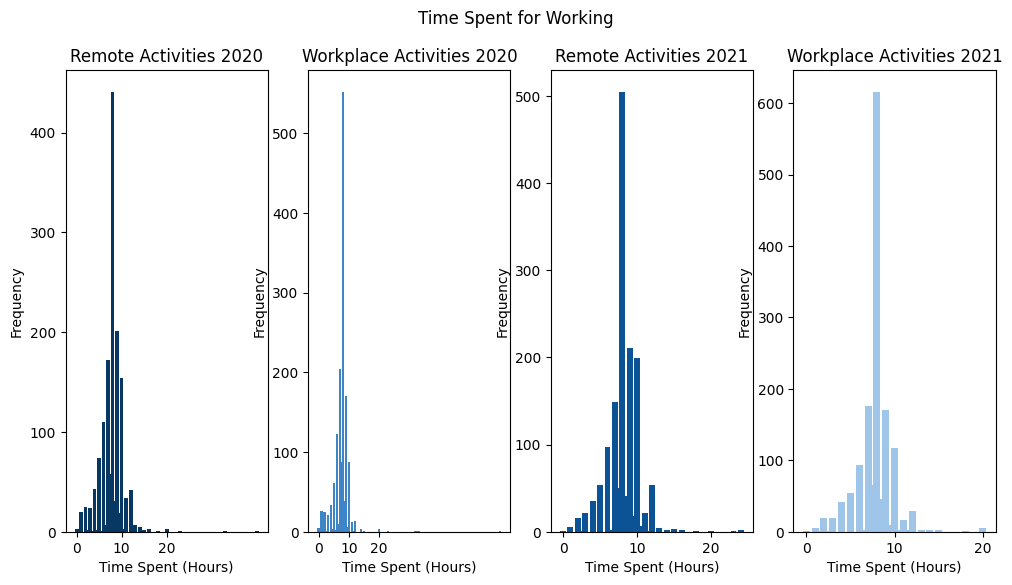

In [133]:
  #working
activities_20_col = nsw_2020_indexupdate[['remote_activity_prep','remote_activity_working','remote_activity_personaltime','remote_activity_responsibilities','workplace_activity_prep','workplace_activity_working','workplace_activity_personaltime','workplace_activity_responsibilities']].copy()
activities_21_col = nsw_2021_indexupdate[['remote_activity_prep','remote_activity_working','remote_activity_personaltime','remote_activity_responsibilities','workplace_activity_prep','workplace_activity_working','workplace_activity_personaltime','workplace_activity_responsibilities']].copy()

remote_work_20 = activities_20_col.pivot_table(index='remote_activity_working', aggfunc='size')
remote_work_21 = activities_21_col.pivot_table(index='remote_activity_working', aggfunc='size')

wp_work_20 = activities_20_col.pivot_table(index='workplace_activity_working', aggfunc='size')
wp_work_21 = activities_21_col.pivot_table(index='workplace_activity_working', aggfunc='size')

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))

fig.suptitle('Time Spent for Working')

axes[0].bar(remote_work_20.index, remote_work_20.values, color ='#073763')
axes[0].set_title('Remote Activities 2020')
axes[0].set_xlabel('Time Spent (Hours)')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(range(0,25,10))

axes[1].bar(wp_work_20.index, wp_work_20.values, color ='#3d85c6')
axes[1].set_title('Workplace Activities 2020')
axes[1].set_xlabel('Time Spent (Hours)')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(range(0,25,10))

axes[2].bar(remote_work_21.index, remote_work_21.values, color ='#0b5394')
axes[2].set_title('Remote Activities 2021')
axes[2].set_xlabel('Time Spent (Hours)')
axes[2].set_ylabel('Frequency')

axes[3].bar(wp_work_21.index, wp_work_21.values, color ='#9fc5e8')
axes[3].set_title('Workplace Activities 2021')
axes[3].set_xlabel('Time Spent (Hours)')
axes[3].set_ylabel('Frequency')

In [ ]:
print(remote_work_20)
print(remote_work_21)
print(wp_work_20)
print(wp_work_21)

remote_activity_working
0.00       3
0.50       3
1.00      20
2.00      25
2.50       2
3.00      24
3.50       1
4.00      43
4.50       2
5.00      74
5.50       1
6.00     110
6.25       2
6.50       7
6.90       1
7.00     172
7.35       1
7.50      58
7.60       3
7.66       1
7.75       1
7.90       1
8.00     441
8.50      31
9.00     201
9.50      19
9.80       1
10.00    154
10.50      3
11.00     34
12.00     42
12.50      2
13.00      7
14.00      5
15.00      2
16.00      3
18.00      1
20.00      3
23.00      1
33.00      1
40.00      1
dtype: int64
remote_activity_working
0.00       1
1.00       5
2.00      16
2.50       1
3.00      22
4.00      35
5.00      54
6.00      97
6.50       2
7.00     149
7.35       1
7.50      50
7.60       1
8.00     505
8.50      41
8.75       2
9.00     211
9.50      18
9.75       1
10.00    199
10.50      6
11.00     21
11.50      1
12.00     54
13.00      4
14.00      2
15.00      3
16.00      2
18.00      1
20.00      1
23.00      1
24.

Text(0, 0.5, 'Frequency')

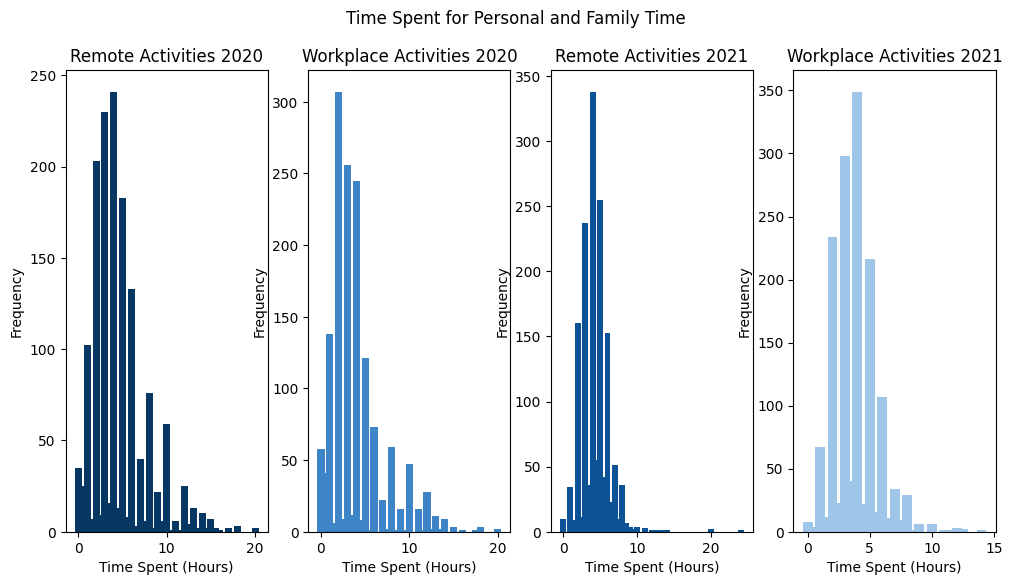

In [134]:
#personaltime
activities_20_col = nsw_2020_indexupdate[['remote_activity_prep','remote_activity_working','remote_activity_personaltime','remote_activity_responsibilities','workplace_activity_prep','workplace_activity_working','workplace_activity_personaltime','workplace_activity_responsibilities']].copy()
activities_21_col = nsw_2021_indexupdate[['remote_activity_prep','remote_activity_working','remote_activity_personaltime','remote_activity_responsibilities','workplace_activity_prep','workplace_activity_working','workplace_activity_personaltime','workplace_activity_responsibilities']].copy()

remote_personaltime_20 = activities_20_col.pivot_table(index='remote_activity_personaltime', aggfunc='size')
remote_personaltime_21 = activities_21_col.pivot_table(index='remote_activity_personaltime', aggfunc='size')

wp_personaltime_20 = activities_20_col.pivot_table(index='workplace_activity_personaltime', aggfunc='size')
wp_personaltime_21 = activities_21_col.pivot_table(index='workplace_activity_personaltime', aggfunc='size')

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))

fig.suptitle('Time Spent for Personal and Family Time')

axes[0].bar(remote_personaltime_20.index, remote_personaltime_20.values, color ='#073763')
axes[0].set_title('Remote Activities 2020')
axes[0].set_xlabel('Time Spent (Hours)')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(range(0,25,10))

axes[1].bar(wp_personaltime_20.index, wp_personaltime_20.values, color ='#3d85c6')
axes[1].set_title('Workplace Activities 2020')
axes[1].set_xlabel('Time Spent (Hours)')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(range(0,25,10))

axes[2].bar(remote_personaltime_21.index, remote_personaltime_21.values, color ='#0b5394')
axes[2].set_title('Remote Activities 2021')
axes[2].set_xlabel('Time Spent (Hours)')
axes[2].set_ylabel('Frequency')

axes[3].bar(wp_personaltime_21.index, wp_personaltime_21.values, color ='#9fc5e8')
axes[3].set_title('Workplace Activities 2021')
axes[3].set_xlabel('Time Spent (Hours)')
axes[3].set_ylabel('Frequency')

In [ ]:
print(remote_personaltime_20)
print(remote_personaltime_21)
print(wp_personaltime_20)
print(wp_personaltime_21)

remote_activity_personaltime
0.00      35
0.10       1
0.25       2
0.50      25
1.00     102
1.50       7
2.00     203
2.50       9
3.00     230
3.50      16
4.00     241
4.50      13
5.00     183
5.50       8
6.00     133
6.50       3
7.00      40
7.50       6
7.75       1
8.00      76
8.50       2
9.00      22
9.50       6
10.00     59
10.50      1
11.00      6
11.25      1
11.50      1
12.00     25
12.40      1
12.50      4
13.00     13
13.50      2
14.00     10
14.40      1
14.50      2
15.00      7
15.50      2
16.00      1
17.00      2
18.00      3
20.00      2
dtype: int64
remote_activity_personaltime
0.00      10
1.00      34
1.50       9
2.00     160
2.50      11
3.00     237
3.50      36
3.60       1
3.70       2
4.00     338
4.25       2
4.50      55
4.69       1
4.70       2
4.90       1
5.00     255
5.20       1
5.25       3
5.39       1
5.50      42
5.80       2
6.00     153
6.50      23
6.75       1
7.00      51
7.50      10
8.00      36
8.50       7
9.00       4
9.50  

Text(0, 0.5, 'Frequency')

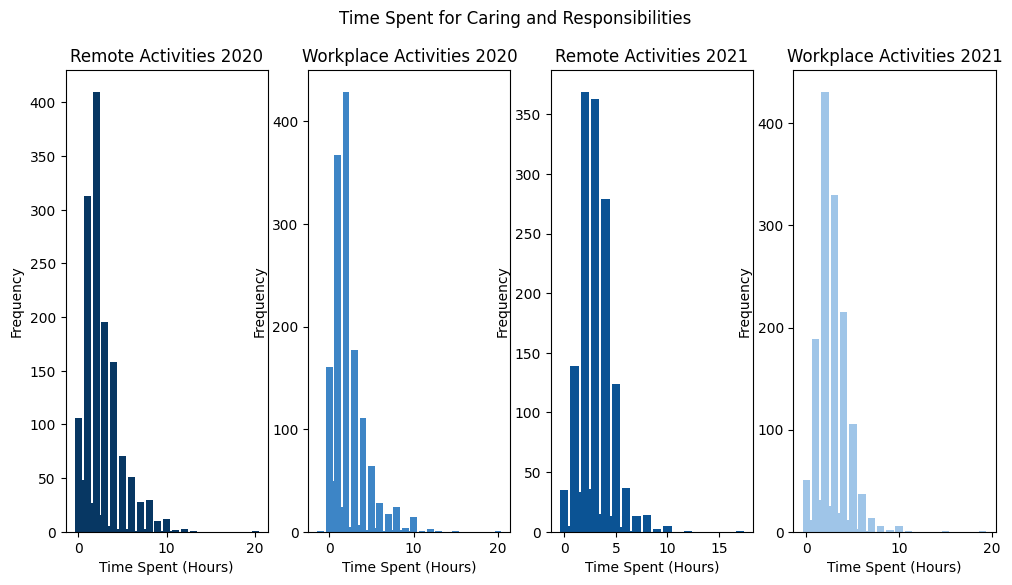

In [135]:
#responsibilities
activities_20_col = nsw_2020_indexupdate[['remote_activity_prep','remote_activity_working','remote_activity_personaltime','remote_activity_responsibilities','workplace_activity_prep','workplace_activity_working','workplace_activity_personaltime','workplace_activity_responsibilities']].copy()
activities_21_col = nsw_2021_indexupdate[['remote_activity_prep','remote_activity_working','remote_activity_personaltime','remote_activity_responsibilities','workplace_activity_prep','workplace_activity_working','workplace_activity_personaltime','workplace_activity_responsibilities']].copy()

remote_responsibilities_20 = activities_20_col.pivot_table(index='remote_activity_responsibilities', aggfunc='size')
remote_responsibilities_21 = activities_21_col.pivot_table(index='remote_activity_responsibilities', aggfunc='size')

wp_responsibilities_20 = activities_20_col.pivot_table(index='workplace_activity_responsibilities', aggfunc='size')
wp_responsibilities_21 = activities_21_col.pivot_table(index='workplace_activity_responsibilities', aggfunc='size')

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))

fig.suptitle('Time Spent for Caring and Responsibilities')

axes[0].bar(remote_responsibilities_20.index, remote_responsibilities_20.values, color ='#073763')
axes[0].set_title('Remote Activities 2020')
axes[0].set_xlabel('Time Spent (Hours)')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(range(0,25,10))

axes[1].bar(wp_responsibilities_20.index, wp_responsibilities_20.values, color ='#3d85c6')
axes[1].set_title('Workplace Activities 2020')
axes[1].set_xlabel('Time Spent (Hours)')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(range(0,25,10))

axes[2].bar(remote_responsibilities_21.index, remote_responsibilities_21.values, color ='#0b5394')
axes[2].set_title('Remote Activities 2021')
axes[2].set_xlabel('Time Spent (Hours)')
axes[2].set_ylabel('Frequency')

axes[3].bar(wp_responsibilities_21.index, wp_responsibilities_21.values, color ='#9fc5e8')
axes[3].set_title('Workplace Activities 2021')
axes[3].set_xlabel('Time Spent (Hours)')
axes[3].set_ylabel('Frequency')

In [ ]:
print(remote_responsibilities_20)
print(remote_responsibilities_21)
print(wp_responsibilities_20)
print(wp_responsibilities_21)

remote_activity_responsibilities
0.00     106
0.05       1
0.20       1
0.25       1
0.40       1
0.45       1
0.50      48
1.00     313
1.20       1
1.50      27
2.00     410
2.20       1
2.50      16
3.00     195
3.50       5
4.00     158
4.50       3
5.00      71
5.50       3
6.00      51
6.50       1
7.00      28
7.50       3
7.90       1
8.00      30
9.00      10
9.50       1
10.00     12
10.50      1
11.00      2
12.00      3
13.00      1
20.00      1
dtype: int64
remote_activity_responsibilities
0.00      35
0.20       1
0.50       5
1.00     139
1.50      33
2.00     369
2.50      36
3.00     363
3.50      15
3.70       2
3.75       1
4.00     279
4.25       1
4.50      13
5.00     124
5.50       4
6.00      37
6.50       1
7.00      13
8.00      14
9.00       2
10.00      5
12.00      1
17.00      1
dtype: int64
workplace_activity_responsibilities
-1.00       1
 0.00     161
 0.05       1
 0.10       1
 0.50      49
 1.00     367
 1.30       1
 1.50      24
 2.00     429
 2.50

In [ ]:
print(remote_responsibilities_20)
sum = remote_responsibilities_20.sum()
avg = statistics.mean(remote_responsibilities_20)
print(avg)
percent =  (remote_responsibilities_20/sum)*100
percent

remote_activity_responsibilities
0.00     106
0.05       1
0.20       1
0.25       1
0.40       1
0.45       1
0.50      48
1.00     313
1.20       1
1.50      27
2.00     410
2.20       1
2.50      16
3.00     195
3.50       5
4.00     158
4.50       3
5.00      71
5.50       3
6.00      51
6.50       1
7.00      28
7.50       3
7.90       1
8.00      30
9.00      10
9.50       1
10.00     12
10.50      1
11.00      2
12.00      3
13.00      1
20.00      1
dtype: int64
45.666666666666664


remote_activity_responsibilities
0.00      7.033842
0.05      0.066357
0.20      0.066357
0.25      0.066357
0.40      0.066357
0.45      0.066357
0.50      3.185136
1.00     20.769741
1.20      0.066357
1.50      1.791639
2.00     27.206370
2.20      0.066357
2.50      1.061712
3.00     12.939615
3.50      0.331785
4.00     10.484406
4.50      0.199071
5.00      4.711347
5.50      0.199071
6.00      3.384207
6.50      0.066357
7.00      1.857996
7.50      0.199071
7.90      0.066357
8.00      1.990710
9.00      0.663570
9.50      0.066357
10.00     0.796284
10.50     0.066357
11.00     0.132714
12.00     0.199071
13.00     0.066357
20.00     0.066357
dtype: float64

Time spent doing activities during working hours will tell employers a lot about productivity. The activities the surveys focus on are Preparing for work and commuting, actually working, caring and domestic responsibilities, and personal and family time. NSW 2021 also included sleep as a factor, but for a better comparison, this will be left out of analysis.

More people took longer in 2021 to prepare for work remotely. The averge time it takes a respondant is a little under an hour. 36-44% of remote workers spent not time at all to prepare for work. 50% of those who prefered working in-office, spent 1-2 hours preparing for work and less than 3% spent little to not time getting ready.

Remote working increased from an average of 36 to 47 hours a week, 8-9 hours a day. Remote workers spend less time working than those who prefer an in-office setting. Remote work in 2021 increased by an additional 10 hours a week. This could be due to overcoming barriers and becoming more efficient in their tasks.

Although they spend less hours working, they utilize less personal time during working hours. This could lead to more productivity than in-office workers. The most time spent utilizing personal time for both working environments is around 4 hours total.



### Question 4

How is time spent based on household description type?

In [ ]:
#Household Discription
house = df.pivot_table(index=['household_descrip'], aggfunc='size') #change to 20 and 21.indexupdate dfs to see the change of demographics between each year
print(house)

house_percent = house/house.sum() * 100
print(house_percent)

remote_responsibilities_20 = activities_20_col.pivot_table(index='remote_activity_responsibilities', aggfunc='size')
remote_responsibilities_21 = activities_21_col.pivot_table(index='remote_activity_responsibilities', aggfunc='size')

wp_responsibilities_20 = activities_20_col.pivot_table(index='workplace_activity_responsibilities', aggfunc='size')
wp_responsibilities_21 = activities_21_col.pivot_table(index='workplace_activity_responsibilities', aggfunc='size')


print(remote_responsibilities_20)
print(remote_responsibilities_21)
print(wp_responsibilities_20)
print(wp_responsibilities_21)

household_descrip
Couple with kids       1118
Couple with no kids     918
Group household         130
Multiple family          81
Single parent           253
Single person           519
dtype: int64
household_descrip
Couple with kids       37.032130
Couple with no kids    30.407420
Group household         4.306062
Multiple family         2.683008
Single parent           8.380258
Single person          17.191123
dtype: float64
remote_activity_responsibilities
0.00     106
0.05       1
0.20       1
0.25       1
0.40       1
0.45       1
0.50      48
1.00     313
1.20       1
1.50      27
2.00     410
2.20       1
2.50      16
3.00     195
3.50       5
4.00     158
4.50       3
5.00      71
5.50       3
6.00      51
6.50       1
7.00      28
7.50       3
7.90       1
8.00      30
9.00      10
9.50       1
10.00     12
10.50      1
11.00      2
12.00      3
13.00      1
20.00      1
dtype: int64
remote_activity_responsibilities
0.00      35
0.20       1
0.50       5
1.00     139
1.50      

In [ ]:
house20 = nsw_2020_indexupdate.pivot_table(index=['household_descrip'], aggfunc='size')
house21 = nsw_2021_indexupdate.pivot_table(index=['household_descrip'], aggfunc='size')
print(house20)
print(house21)



time_20_house = nsw_2020_indexupdate[['household_descrip', 'remote_activity_responsibilities','workplace_activity_responsibilities']]
time_21_house = nsw_2021_indexupdate[['household_descrip', 'remote_activity_responsibilities','workplace_activity_responsibilities']]
time_20_house

#groupby
time_20_house_responsibilities = time_20_house.groupby('household_descrip')[['remote_activity_responsibilities','workplace_activity_responsibilities']].sum().unstack()
time_21_house_responsibilities = time_21_house.groupby('household_descrip')[['remote_activity_responsibilities','workplace_activity_responsibilities']].sum().unstack()



household_descrip
Couple with dependent children                560
Couple with no dependent children             500
Group household                                57
Multiple family household                      27
One  parent family with dependent children     62
Other one family household                     35
Single person                                 266
dtype: int64
household_descrip
Couple with dependent children               558
Couple with no dependent children            418
Group household                               73
Multiple family household                     54
One parent family with dependent children    105
Other one family household                    51
Single person                                253
dtype: int64


In [ ]:
time_20_house_responsibilities

                                     household_descrip                         
remote_activity_responsibilities     Couple with dependent children                1688.75
                                     Couple with no dependent children             1163.10
                                     Group household                                137.20
                                     Multiple family household                       75.00
                                     One  parent family with dependent children     214.00
                                     Other one family household                      75.50
                                     Single person                                  608.10
workplace_activity_responsibilities  Couple with dependent children                1485.85
                                     Couple with no dependent children             1000.80
                                     Group household                                109.60
          

In [ ]:
time_21_house_responsibilities

                                     household_descrip                        
remote_activity_responsibilities     Couple with dependent children               1840.9000
                                     Couple with no dependent children            1163.0000
                                     Group household                               197.5000
                                     Multiple family household                     162.5000
                                     One parent family with dependent children     371.0000
                                     Other one family household                    156.5000
                                     Single person                                 629.7000
workplace_activity_responsibilities  Couple with dependent children               1695.5000
                                     Couple with no dependent children            1048.6999
                                     Group household                               181.0000
 

There was an increase of more time spent for caring and domestic responsibilities during 2021 in both remote and in-person work hours, 12-17 hours more than 2020. This is due to more people having children during the height of the pandemic with lock-downs and isolations in full-effect.Remote workers’ households increased by 9% from 2020 to 2021 and in-office workers increased by 14%, in total a 23% increase in couples with dependent children.


## Mental Health & Overall Well-Being

### Question 1

How satisfied are remote workers with their current job situation?


My work-life balance                    2282
My working relationships                1932
My opportunities to socialise           1927
Preparing for work and commuting        1813
Managing my personal commitments        1434
The number of hours  I work             1432
My daily expenses                       1427
My on-the-job learning opportunities    1338
My mental wellbeing                     1286
My job satisfaction                     1219
Managing my family responsibilities     1113
My personal relationships                881
Name: count, dtype: int64


Text(0, 0.5, 'Aspects')

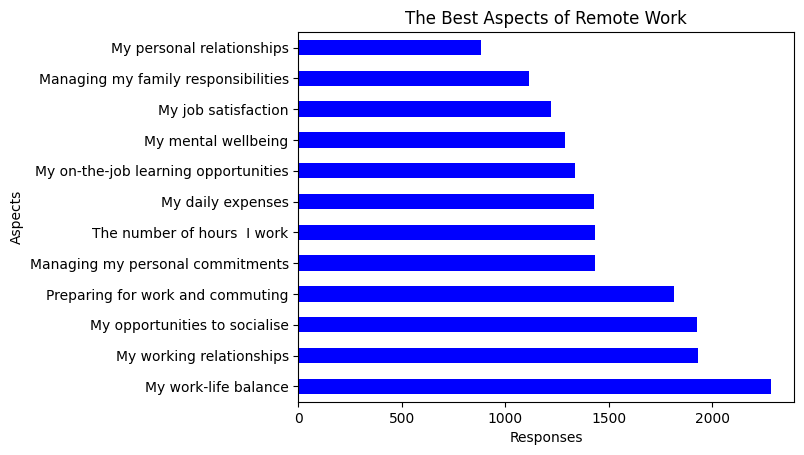

In [137]:
remote_best_aspects_col = nsw_2020_indexupdate[['compare_remote_1','compare_remote_2','compare_remote_3',
                                                'compare_remote_4','compare_remote_5','compare_remote_6',
                                                'compare_remote_7','compare_remote_8','compare_remote_9',
                                                'compare_remote_10','compare_remote_11','compare_remote_12']].copy()

#create an empty set list to store unique values
unique_values = set()
  #for loop: iterate over each column and update unique values set
for col in remote_best_aspects_col.columns:
  unique_values.update(remote_best_aspects_col[col].unique())

  #create a DF with the unique values
remote_best_aspects_uniq = pd.DataFrame({'Unique Values 2020': list(unique_values)})
remote_best_aspects_uniq

aspects = remote_best_aspects_col.stack()
value_counts = aspects.value_counts()
print(value_counts)

#plot
value_counts.plot(kind='barh', color ='blue')
plt.title('The Best Aspects of Remote Work')
plt.xlabel('Responses')
plt.ylabel('Aspects')

Employees voted the most for work-life balance, working relationships, and their opportunities to socialise. Job satisfaction, managing family responsibilities, and personal relationships were the least voted for. This is particularly interesting because of the remote aspect would lead one to believe in the opposite in regards to relationships and socializing and job satisfaction and mental well being being lower than expected.

In [ ]:
#2021 agr_dis_remote
feeling_better = nsw_2021_indexupdate.pivot_table(index = 'agr_dis_remote_feeling', aggfunc='size')
print(feeling_better)

#Agr_dis_remote_active
active = nsw_2021_indexupdate.pivot_table(index = 'agr_dis_remote_active', aggfunc='size')
print(active)

agr_dis_remote_feeling
Neither agree nor disagree    446
Somewhat agree                495
Somewhat disagree             122
Strongly agree                404
Strongly disagree              45
dtype: int64
agr_dis_remote_active
Neither agree nor disagree    384
Somewhat agree                486
Somewhat disagree             187
Strongly agree                375
Strongly disagree              80
dtype: int64


Respondents were asked to rate whether they agreed with certain statements. The statements were related to their well-being and physical activity levels. Out of all the respondents, 59% agreed that they felt better while working remotely. Furthermore, 57% agreed that they were physically active when they worked remotely.


## Businesses' Perceptions

### Question 1
What are mangement's perceptions of how remote work impacted them?

{'agr_dis_mgr_resp_emp_retainment': agr_dis_mgr_resp_emp_retainment
Agree                         407
Neither agree nor disagree    141
Disagree                       47
Name: count, dtype: int64, 'agr_dis_mgr_resp_recruitment': agr_dis_mgr_resp_recruitment
Agree                         351
Neither agree nor disagree    196
Disagree                       48
Name: count, dtype: int64, 'agr_dis_mgr_resp_collab_effectivness': agr_dis_mgr_resp_collab_effectivness
Agree                         438
Neither agree nor disagree    102
Disagree                       55
Name: count, dtype: int64, 'agr_dis_mgr_resp_easy_management': agr_dis_mgr_resp_easy_management
Agree                         404
Neither agree nor disagree    105
Disagree                       86
Name: count, dtype: int64, 'agr_dis_mgr_resp_poor_perf': agr_dis_mgr_resp_poor_perf
Agree                         286
Neither agree nor disagree    157
Disagree                      152
Name: count, dtype: int64, 'agr_dis_mgr_resp_prep'

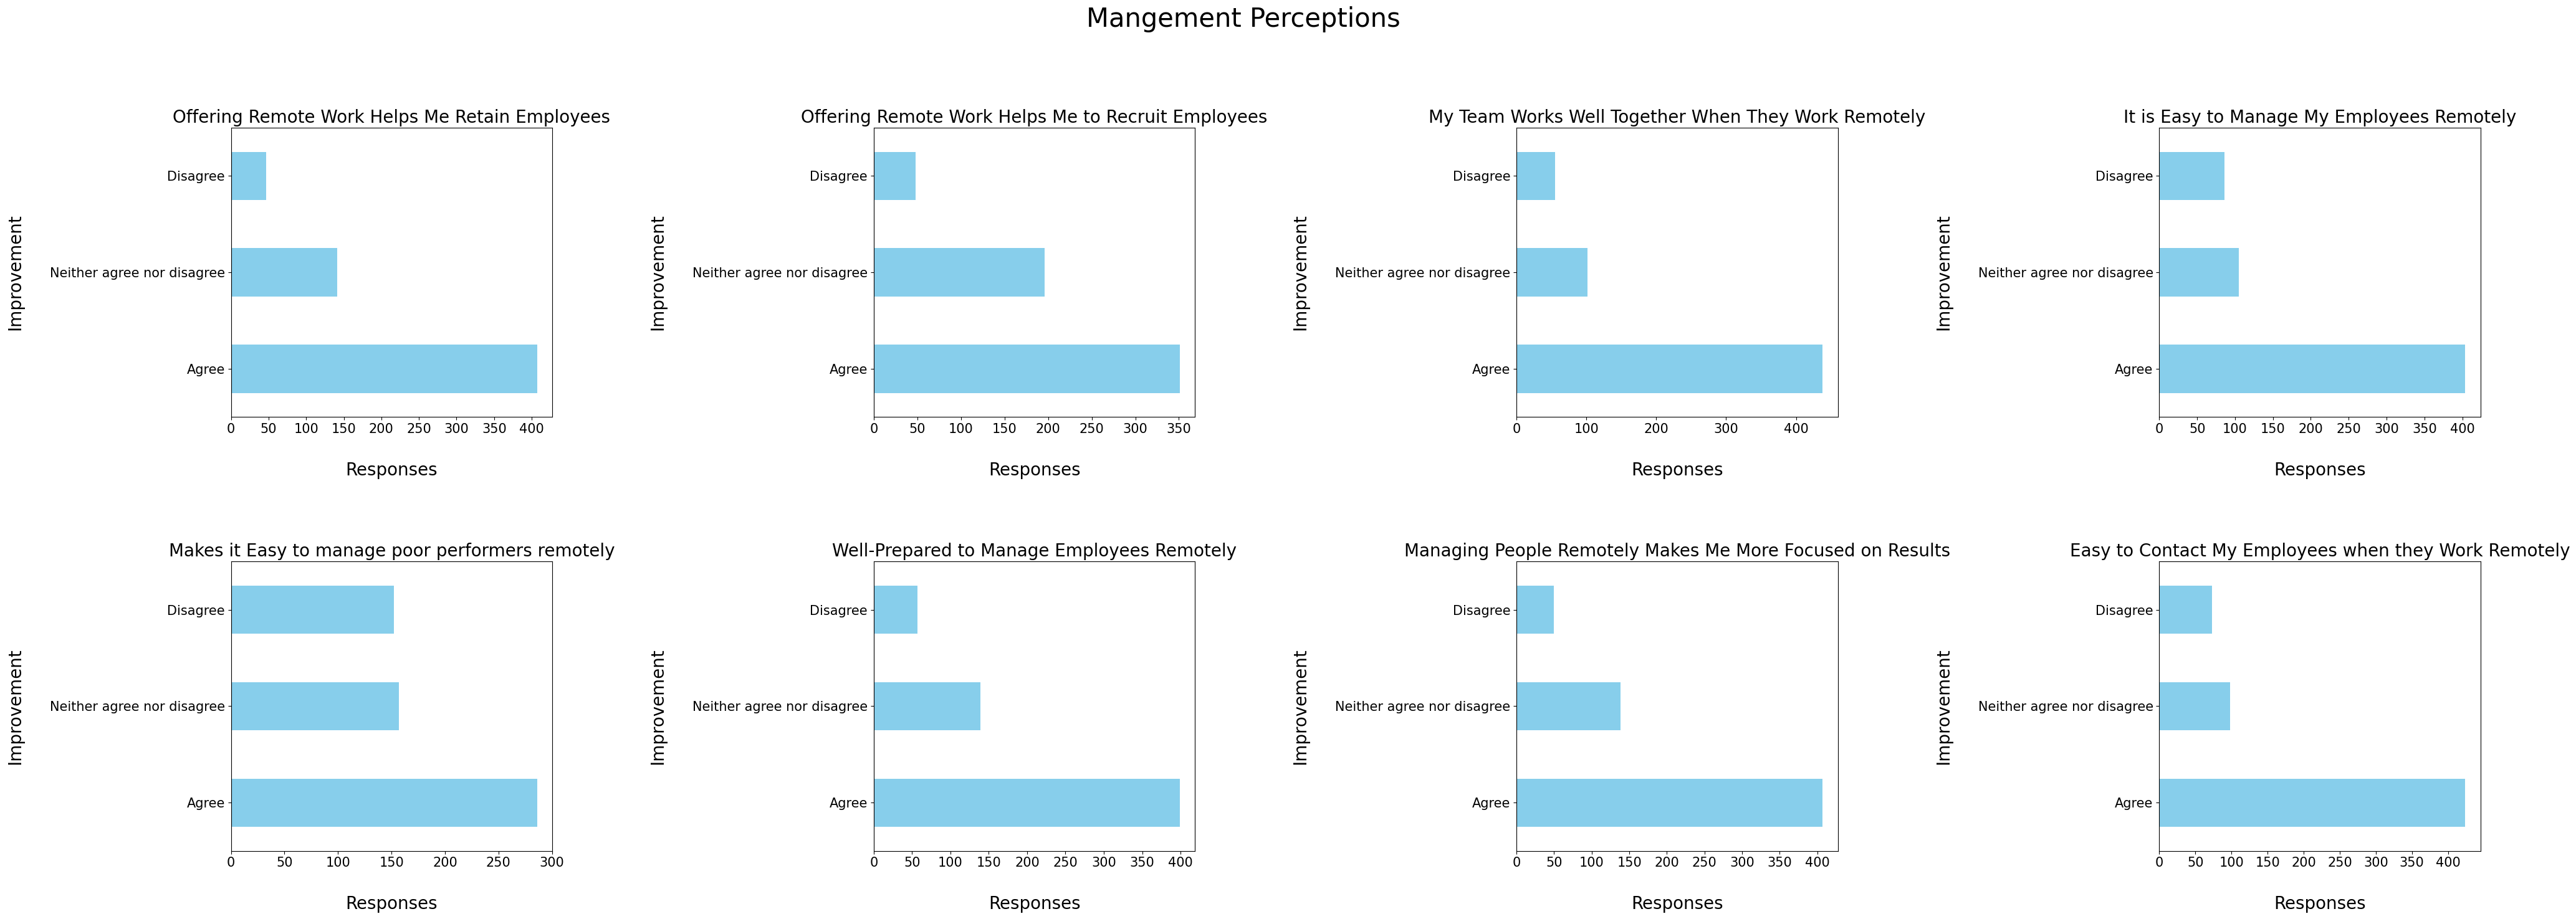

In [114]:
mgr_perceptions = nsw_2021_indexupdate[['agr_dis_mgr_resp_emp_retainment','agr_dis_mgr_resp_recruitment','agr_dis_mgr_resp_collab_effectivness',
                                        'agr_dis_mgr_resp_easy_management','agr_dis_mgr_resp_poor_perf','agr_dis_mgr_resp_prep','agr_dis_mgr_resp_results',
                                        'agr_dis_mgr_resp_emp_contact']].copy()

mgr_perceptions_dict = {'Strongly disagree':'Disagree','Somewhat disagree':'Disagree','Strongly agree':'Agree','Somewhat agree':'Agree'}

mgr_perceptions.replace(mgr_perceptions_dict,inplace = True)

for column in mgr_perceptions.columns:
    mgr_perceptions[column] = mgr_perceptions[column][mgr_perceptions[column] != 'Not Available']


#pivot tables for each column
pivot_tables = {}
for column in mgr_perceptions.columns:
  pivot_table = mgr_perceptions[column].value_counts()
  pivot_tables[column] = pivot_table
print(pivot_tables)

#plot
figure, axes = plt.subplots(2, 4, figsize = (40, 15))
figure.suptitle('Mangement Perceptions', fontsize=30)

#rename columns
column_mgr_perceptions_mapping = {'agr_dis_mgr_resp_emp_retainment':'Offering Remote Work Helps Me Retain Employees',
                                  'agr_dis_mgr_resp_recruitment':'Offering Remote Work Helps Me to Recruit Employees',
                                  'agr_dis_mgr_resp_collab_effectivness':'My Team Works Well Together When They Work Remotely',
                                  'agr_dis_mgr_resp_easy_management':'It is Easy to Manage My Employees Remotely',
                                  'agr_dis_mgr_resp_poor_perf':'Makes it Easy to manage poor performers remotely',
                                  'agr_dis_mgr_resp_prep':'Well-Prepared to Manage Employees Remotely',
                                  'agr_dis_mgr_resp_results':'Managing People Remotely Makes Me More Focused on Results',
                                  'agr_dis_mgr_resp_emp_contact':'Easy to Contact My Employees when they Work Remotely'}

num_columns = min(len(mgr_perceptions.columns), 8)
for i in range(num_columns):
    column = mgr_perceptions.columns[i]
    pivot_table = mgr_perceptions[column].value_counts()
    row = i // 4
    col = i % 4
    pivot_table.plot(kind='barh', ax=axes[row, col], color='skyblue', fontsize=15)
    axes[row, col].set_title(column_mgr_perceptions_mapping.get(column, column), fontsize=20)
    axes[row, col].set_xlabel('Responses', fontsize=20,labelpad=30)
    axes[row, col].set_ylabel('Improvement', fontsize=20, labelpad=30)

plt.tight_layout()
plt.subplots_adjust(top=0.85, wspace=1, hspace=0.5)
plt.show()

More than half of managment agreed in almost every perception question asked that remote work benefitted them. They especially agreed that it was easiter to contact their employees when they work remotely and that their team works well together when they work remotely.  

# Conclusion

## Findings

The impact of the Pandemic was a turning point for how we interact with one another in a working environment and our point of view on a work-life balance. Surveys like the NSW survey gave many an insight into their own perceptions of their work-life balance, job satisfaction, and productivity. The surveys also gave those who are looking to implement a remote or hybrid model in their businesses a deeper understanding of building a successful policy.
After thorough analysis in an attempt to answer the guiding questions initially outlined, the results suggest:


*   The current workforce is largely made up of Generation X and Millennials. As Baby Boomers retire and Gen Z begins to enter the workforce, couples, both with and without children, as well as single individuals, make up the majority of these age groups.
*   The industries that utilize remote work the most are professional, scientific, & technical, financial & insurance, and education & training.
*   Barriers most commonly found that workers struggled with have mainly to do with potential mental health issues as a result of remote working.
*   Overall employees viewed remote working as a more positive outcome to their well-being.
*  Overall management believes remote work is an appealing benefit for potential employees to work for their company, as well as management overall being attainable.
*    Surveyors asked for employees' opinions on their current remote work policy management established. Their responses identified that 68% of workers think that remote working is positive for their employer and also thought positively about the current policy in place. They also thought that the policy suited them well.









In [ ]:
#Pos_neg_remote_employer
pos_neg_remote_employer_ptable = nsw_2021_indexupdate.pivot_table(index='pos_neg_remote_employer', aggfunc ='size')
print(pos_neg_remote_employer_ptable)

#Policy_satisfaction
policy_satisfaction_ptable = nsw_2021_indexupdate.pivot_table(index='policy_satisfaction', aggfunc='size')
print(policy_satisfaction_ptable)

#Agr_dis_policy_suitability
agr_dis_policy_suitability_ptable = nsw_2021_indexupdate.pivot_table(index='agr_dis_policy_suitability', aggfunc='size')
print(agr_dis_policy_suitability_ptable)

pos_neg_remote_employer
Neither positive nor negative    298
Somewhat Negative                150
Somewhat Positive                582
Strongly Negative                 37
Strongly Positive                445
dtype: int64
policy_satisfaction
Neither positive nor negative    297
Somewhat Negative                108
Somewhat Positive                512
Strongly Negative                 56
Strongly Positive                539
dtype: int64
agr_dis_policy_suitability
Neither agree nor disagree    277
Somewhat agree                509
Somewhat disagree             113
Strongly agree                526
Strongly disagree              87
dtype: int64


## Recommendations

Based on these findings, the recommendation is to focus on the needs of the employees.
“What is good for people is good for the organization” [7, p. 5]. It is suggested to do research on policies other similar companies has established and then tailor to your company’s specific needs. The most important thing to do is to understand your employees by studying their demographics and their needs. By understanding the needs of your employees, you can tailor your policy. Utilizing UCLA’s and Vanderbloemen’s, an executive search firm, guidelines for a remote working policy, the recommendations on elements to implement and discuss are as follows:

* Eligibility: It is a popular
practice that new employees are eligible for remote work but will spend a specified amount of time working in the office for training. Looking at those who are more technologically savvy is something to consider when choosing eligible employees. Upper management with a job description that fits well with remote working is also common when considering eligibility.
* Required Software Tools: Consider what will be needed for optimal management and communication between coworkers and clients. Managers may want to consider software based on the company’s needs such as project management, customer relationship management, marketing tools, e-commerce, website management, et cetera. They also want to consider software that will support their employees such as collaboration and productivity software like Slack or Trello and communication like Zoom or Microsoft Teams.
* Availability and Time Management: Being able to keep track of when employees clock in and out is important, whether that is investing in automated time clock software or finding an alternative. Sharing calendars on schedules is a suggestion to coordinate availability.
* Productivity Management: New productivity measures and consistent follow-up reports should be administered. Implement attainable and reasonable goals.
* Work Space and Equipment: Deciding on what equipment the company should invest in or compensate their employees for should be based on the company budget and employee’s needs to be successful. Also dictating on where an appropriate working space should be when having video meetings is up to the discretion of management.
* Data Security: Since employees are having access to company information in their personal environment, there needs to be a measure of data security that is involved when handling company or clientele information based on the industry [8, 9].


Whatever decision management decides to do when it comes to implementing a work from home policy, it is importatnt to remember what is in the best interest of the employees will be in the best interest of the company to be successful.  

